# Supervised Learning Project: Linear Regression

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \$52.7 billion by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. A startup company aiming to tap the potential in this market wants to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# For mounting Google Drive to the notebook 
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [3]:
# read the data
data = pd.read_csv("/content/drive/MyDrive/Data Science/Linear Regression/ReCell Project/used_device_data.csv")

In [4]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Data Overview

- Data Overview [Observations/Sanity check]
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates



In [5]:
# first few rows of dataframe
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [6]:
#last few rows of dataframe
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


Cursory Observations:

*   Dataset contains information about different smartphones/tablets
*   Android seems to be a pretty common operating system
*   4g is available in most devices
*   13 MP is a pretty common resolution for front camera
*   Used prices are always cheaper than new prices which is expected



In [7]:
df.shape

(3454, 15)

There are **3454** rows and **15** columns in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observations: 

* There are 3 datatypes in the different columns of the dataset: integer, float and string

* There are 4 categorical variables and 11 numerical variables including two variabes of type int and rest are of type float

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


Observations:

*   Screen size ranges from ~5 to 31 cms with a mean of ~13.7 cm
*   Main camera mp ranges from 0.08 to 48 with a mean ~9.5 MP
*   Selfie camera mp ranges from 0 (likely selfie camera absent) to 32 MP with a mean of 6.5 MP, lower than the average main camera mp
*   Int memory ranges from 0.01 GB to 1 TB with a median of 32 GB
*   Most devices seem to have 4 GB RAM as 25th, 50th and 75 th percentiles are all 4 GB and so is the mean
*   Both battery and weight may have outliers on the high end as mean~median but the max value is fairly high compared to the 25th, 50th and 75th percentile values
* Device release years range from 2013 to 2020
* Median no of days used for most devices is approximately 2 years (690 days)
* Median normalized used price is ~4.4 euros while the median normalized new price is ~5.2 euros
* Days used , normalized used price and normalized new price likely have normal distributions as mean ~ median values

*   There are missing values in `main_camera_mp`, `selfie_camera_mp`, `int_memory`, `ram`, `battery` and `weight`



In [10]:
df.describe(include =[object, 'category']).T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


Observations:

*   There are 34 unique brands with the most common brand name being "Others" which may be an aggregation of multiple brands
*   There are 4 different OS in the used devices with Android being by far the dominant Os 
*   Majority of devices have 4g available on them 
* Most devices don't have 5g available on them



### Checking for duplicate values

In [11]:
data.duplicated().sum()

0

There are no duplicate values

### Checking for missing values

In [12]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are missing values in several columns. We would have to treat them during data pre-processing

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Pre-defined functions for EDA and data visualization

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Exploratory Data Analyses

### (A) Univariate Analyses

### Brand Name

In [15]:
df.brand_name.nunique()

34

In [16]:
df.brand_name.value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

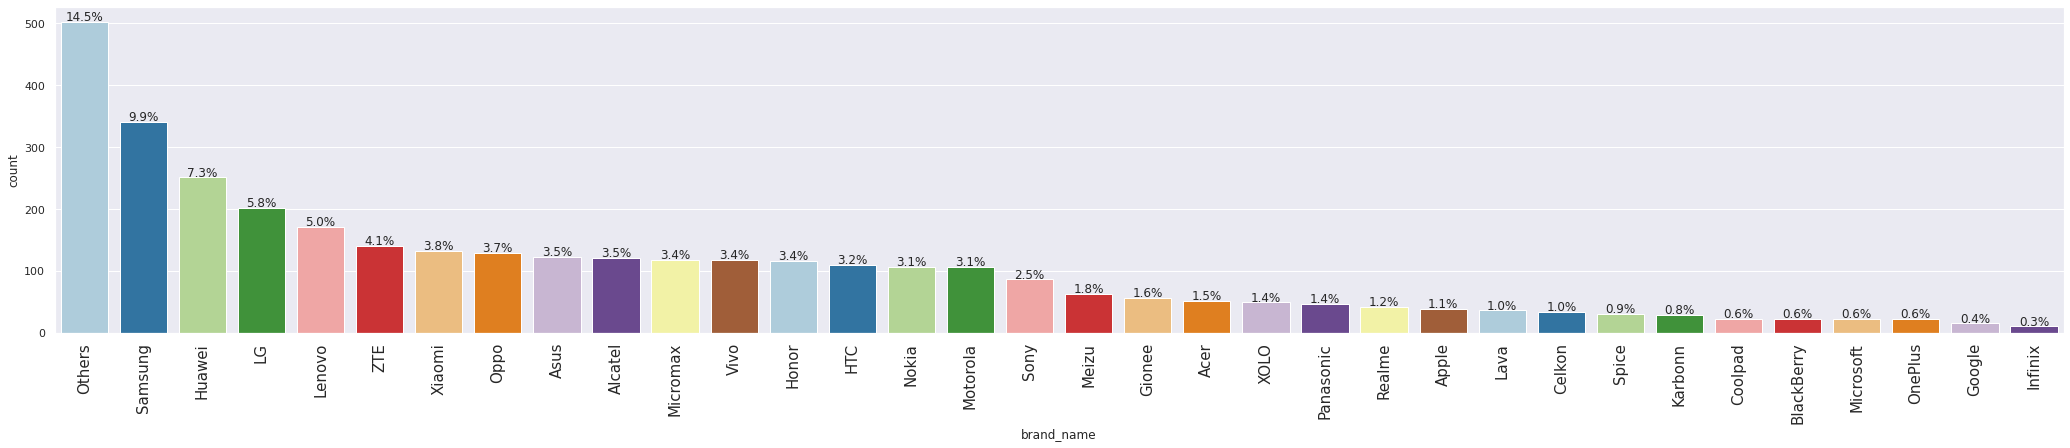

In [17]:
labeled_barplot(df, "brand_name", perc=True)

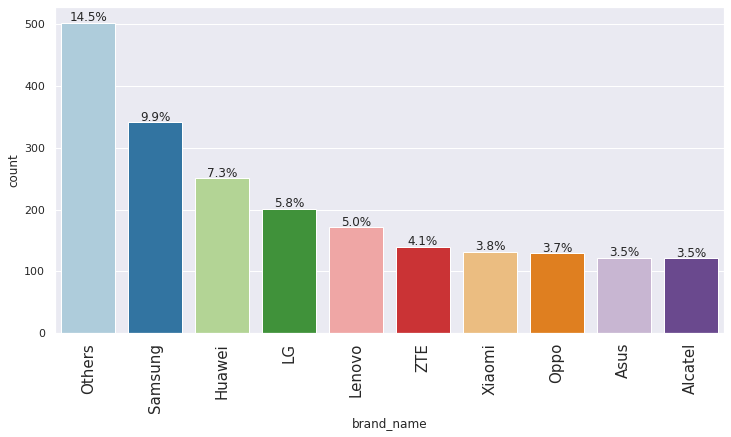

In [18]:
labeled_barplot(df, "brand_name", perc=True, n=10)

Observations:



*   There are 34 different brands of used devices in the dataset including "Others" which likely includes multiple brands 
*   Others make up 14.5% of the market of used devices
* Other major brands in the top 5 include Samsung, Huawei, LG and Lenovo
* Samsung devices makes up nearly 10% of the total market with Huawei (7.3%), LG(5.8%) and Lenovo (5%)
* Major brands such as Apple have a much smaller market share only making up 1.1% of the used devices market maybe suggesting customers likely buy more new devices than used devices.



### OS [Operating System]

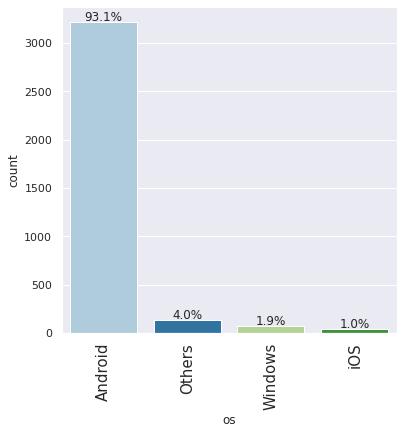

In [19]:
labeled_barplot(df, "os", perc=True)

### Q2. What percentage of the used device market is dominated by Android devices?

*   Android devices dominates the used device market with a whopping **93.1%** used devices running on Android OS
*   Apple (iOS) and Windows make up only 1% and 1.9% of the used device market while others make up the remaining 4%


### 4G

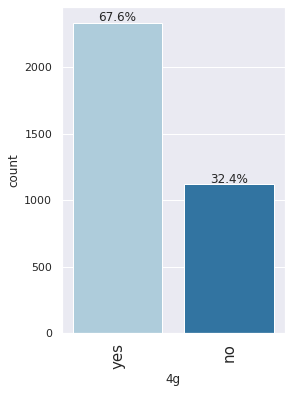

In [20]:
labeled_barplot(df, "4g", perc=True)

Observations

*   4G is available on 67.6% of the used devices
*   4G is unavailable on the remaining 32.4% of used devices






### 5G

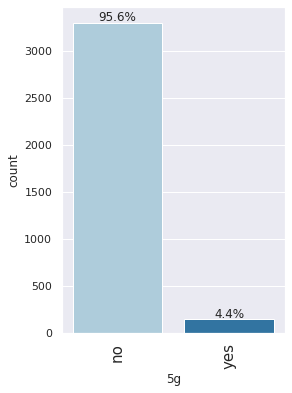

In [21]:
labeled_barplot(df, "5g", perc=True)

5G is **unavailable** on 95.6% of the used devices and only 4.4% of devices have 5G available to them

### Screen Size

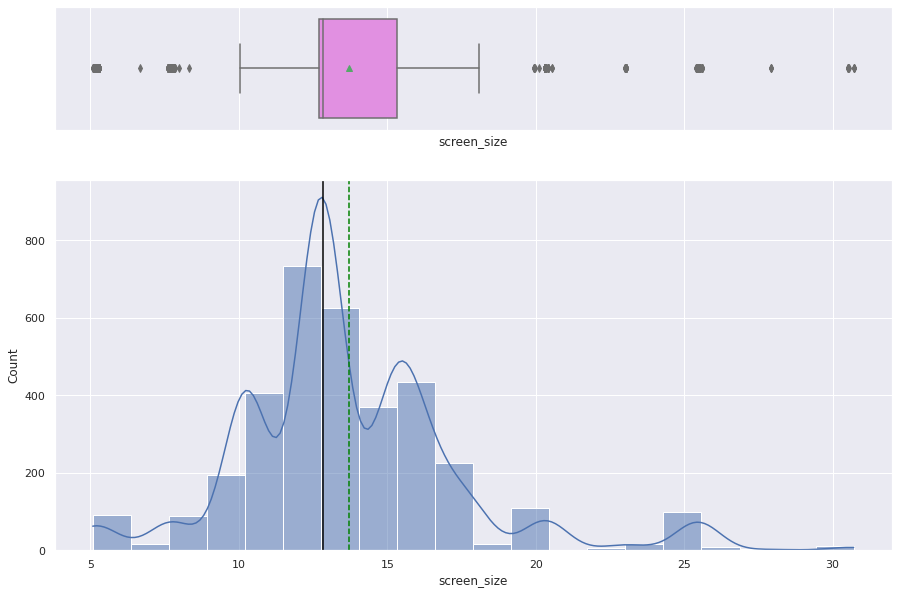

In [22]:
histogram_boxplot(df,'screen_size', kde=True,bins=20)

### Observations: 

*   Median screen size is ~ 13 cm very close to the mean screen size ~ 14 cm

*   Distribution of screen size approximates a normal distribution with fatter tails to a slightly right skewed distribution 

* Several outlier values exist both on the left and right making the distribution tail more spread out


### Q5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?



In [23]:
# screen size is in cms
# 1 inch = 2.54 cm, so multiply screen size (in cm) x 2.54 = screen size in inches

screen_size_greater_than_6inches = df[df['screen_size']>(6*2.54)].shape[0]

print("No of devices with greater than six inches of screen size are :",screen_size_greater_than_6inches )

print("\n Percentage of larger than six inch screen size devices are :", round((screen_size_greater_than_6inches/df.shape[0]*100),2))

No of devices with greater than six inches of screen size are : 1099

 Percentage of larger than six inch screen size devices are : 31.82


Observations

*   **1099** devices of the dataset have larger than six inches of screen size

*   These devices make up **31.82%** of the total devices of the used devices dataset



### Main Camera mp

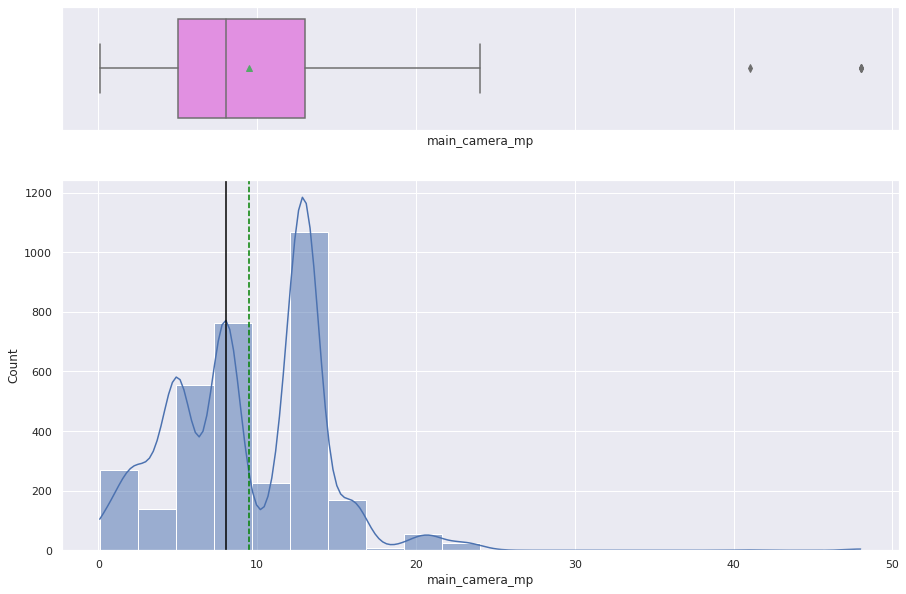

In [24]:
histogram_boxplot(df,'main_camera_mp', kde=True, bins=20)

Observations:

*   Main camera mp seems to have a right skewed distribution with outlier values on the right
*   Mean and median values are between 7.5-10 MP
* A large no of devices (>1000) seem to have between 12.5-15 MP main camera



### Selfie Camera mp

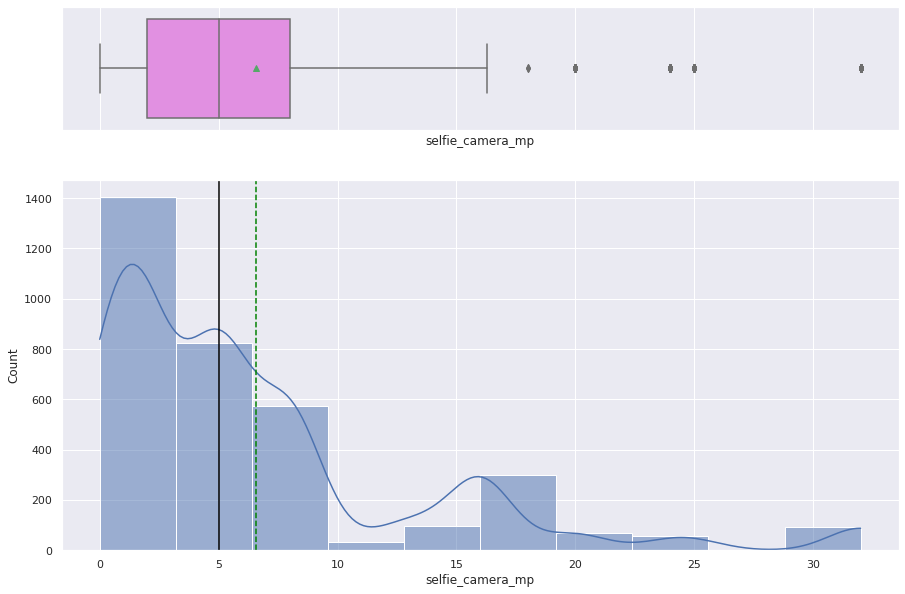

In [25]:
histogram_boxplot(df,'selfie_camera_mp', kde=True,bins=10)

Observations:
 

*   Selfie camera mp follows a heavily right skewed distribution with lots of outlier values on the right
*   A large no of devices have selfie camera resolutions between 0-3.2 MP( nearly 1400) and 3.2-6.4 MP (slightly more than 800)



### Internal memory

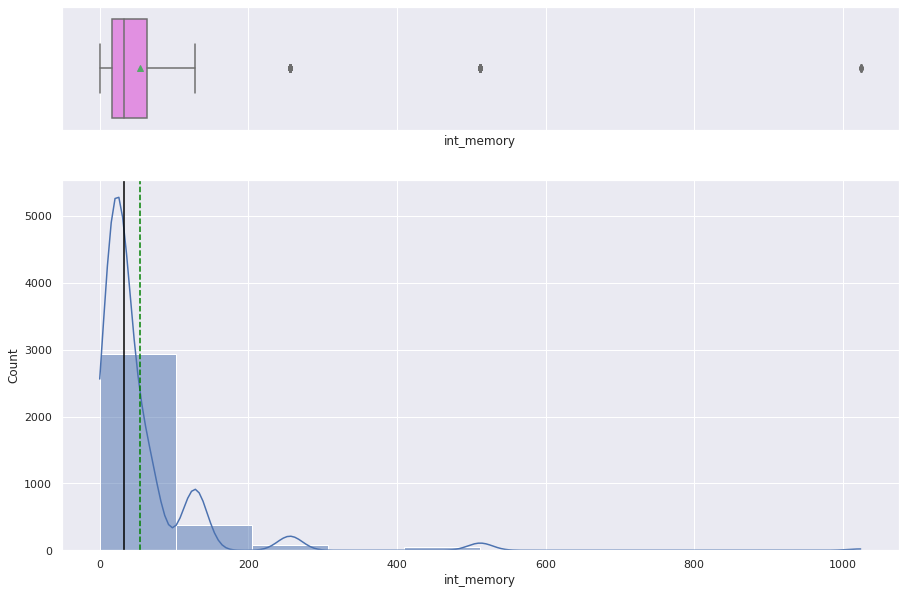

In [26]:
histogram_boxplot(df,'int_memory', kde=True,bins=10)

Observations

*   Int memory follows a right skewed distribution with a number of right outliers
*   Nearly 3000 used devices have int_memory less than 100 GB




### RAM

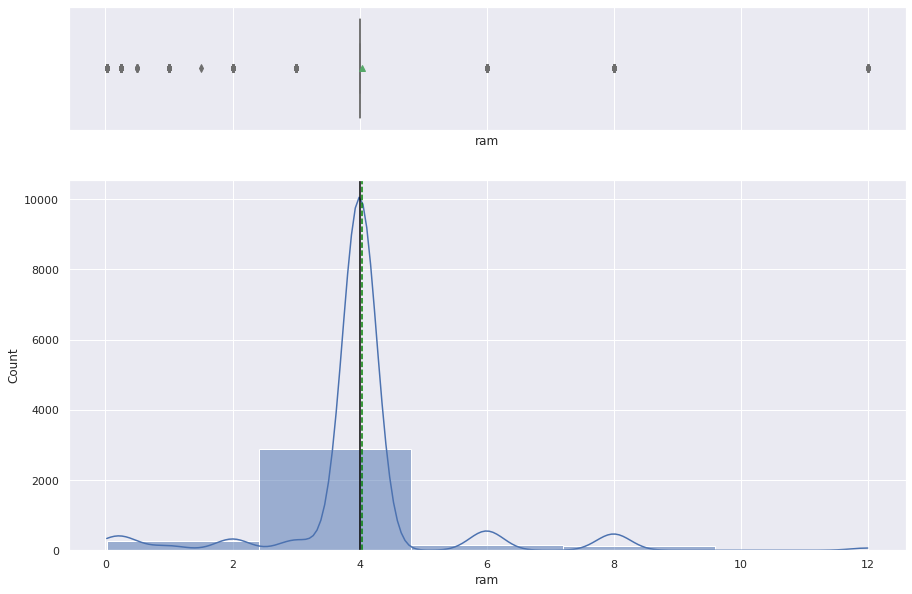

In [27]:
histogram_boxplot(df,'ram', kde=True,bins=5)

Most devices have a RAM size of 4 GB. However, it is hard to visualize the RAM distribution across devices through a histogram or box plot, as RAM values appear to be more discrete

Because RAM size has discrete values, its distribution may be better visually represented through a bar plot instead of histogram or boxplot

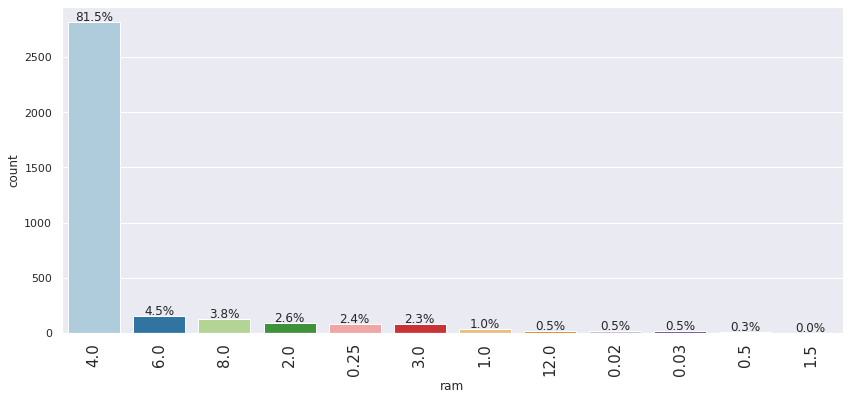

In [28]:
labeled_barplot(df, "ram", perc=True)

Observations:

*   Vast majority of devices have 4.0 GB RAM making up 81.5% of the used devices market.
*   Next five popular RAM sizes are the following with market shares in parantheses: 6 GB (4.5%) , 8 GB (3.8%), 2 GB (2.6%), 0.25 GB (2.4%) and 3 GB (2.3%)



### Battery

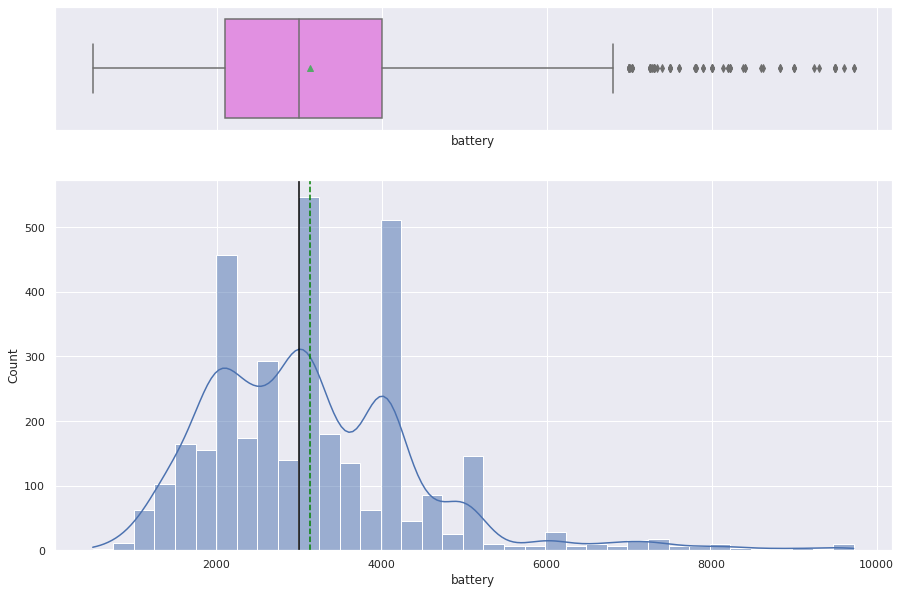

In [29]:
histogram_boxplot(df,'battery', kde=True)

Battery follows a right skewed distribution with a fat right tail due to a number of outliers on the right

### Weight

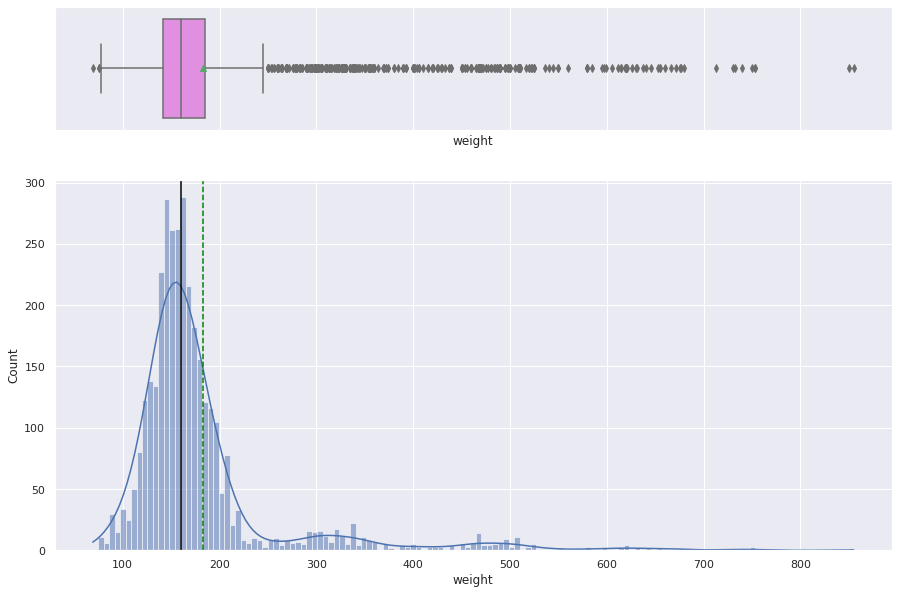

In [30]:
histogram_boxplot(df,'weight', kde=True)

Weight follows a heavily right skewed distribution with a large number of outlier values on the right

### Release year

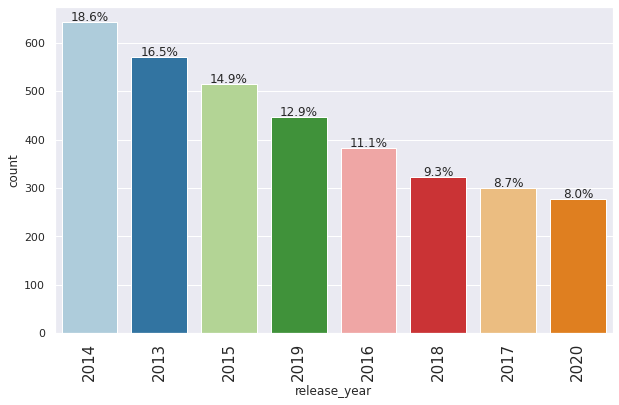

In [31]:
labeled_barplot(df, "release_year", perc=True)

Observations:

*   Release years for the used device market ranges from 2013 to 2020
*  Devices released in 2013-2015 make up 50% of the used devices market
* In contrast, devices released between 2018-2020 only make up 30% of the market
* Customers may be more willing to sell devices with older release years (e.g. 2013-2015) thereby increasing their market share as they buy newer devices






### Days Used

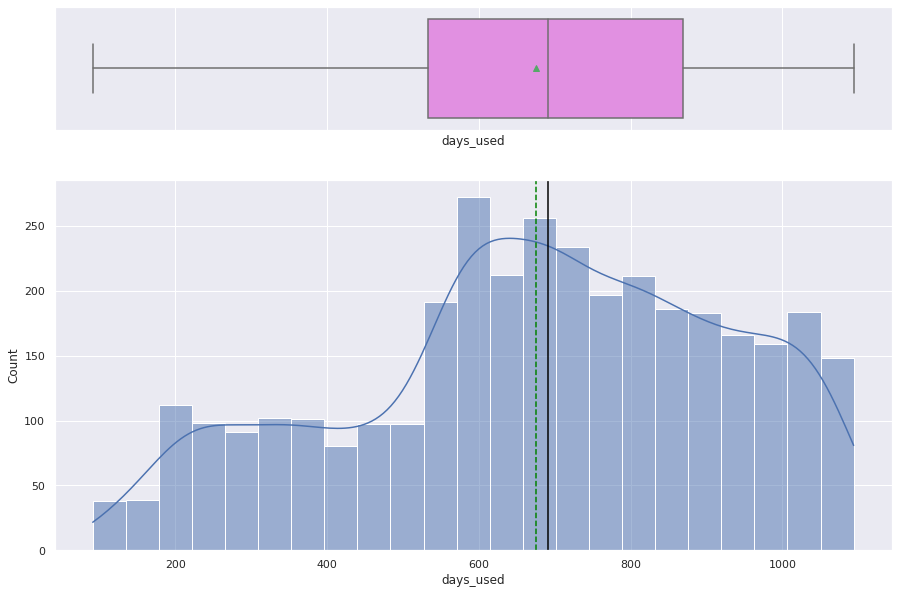

In [32]:
histogram_boxplot(df,'days_used', kde=True)

Days used follow a slightly left skewed distribution

Mean and median number of days used for devices are broadly similar between 650-700 days (roughly 2 years)

### Normalized New Price

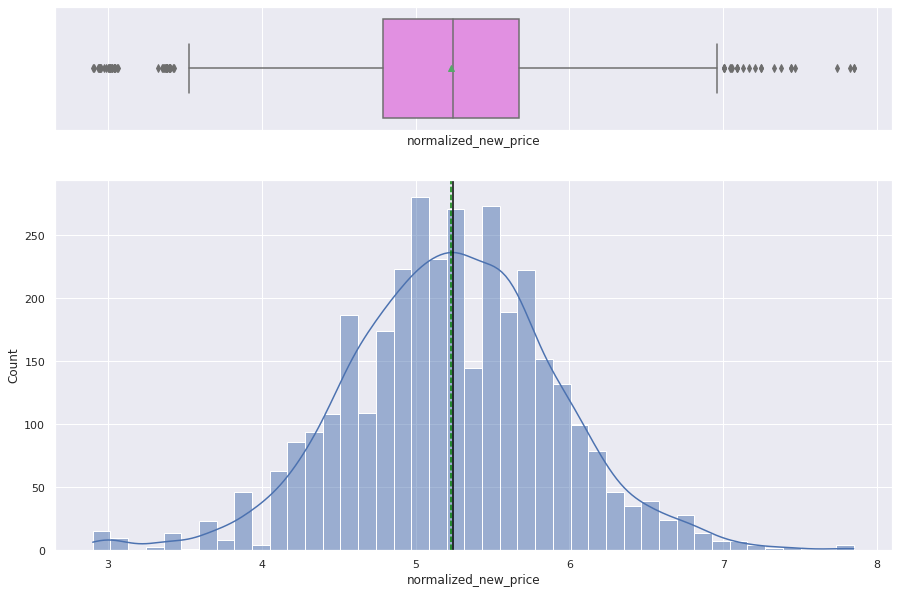

In [33]:
histogram_boxplot(df,'normalized_new_price', kde=True)

Observations:


*   Normalized new prices follows an approximately normal distribution
*   Mean and median normalized new prices are very similar (~5.2 euros)


### Normalized Used Price

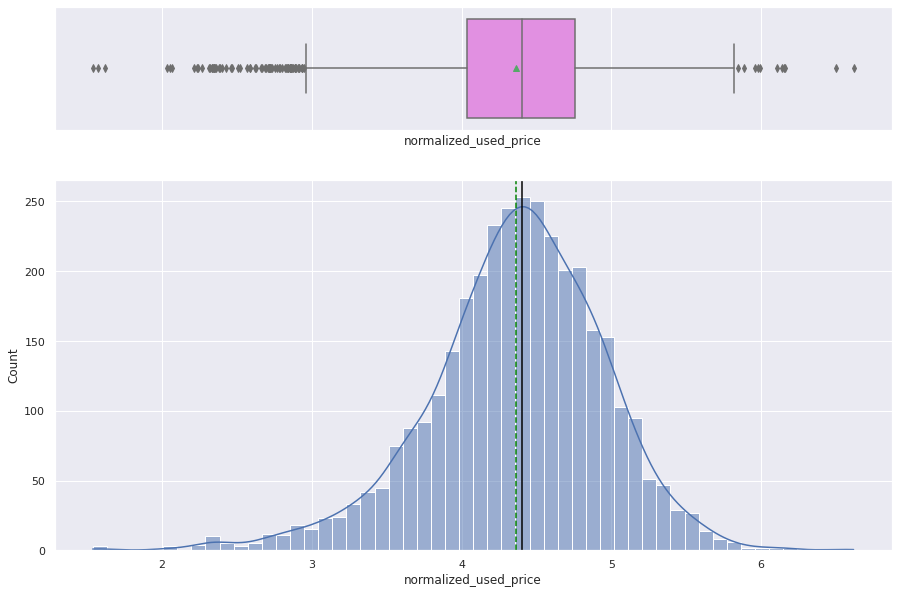

In [34]:
histogram_boxplot(df,'normalized_used_price', kde=True)

Observations:


*   Normalized used prices follows an approximately normal distribution
*   Mean and median normalized used prices are close to each other (~4.5 euros)

### Q1. What does the distribution of normalized used device prices look like?

Normalized used device price shows an approximately normal distribution which is slightly left skewed due to the presence of a greater number of outliers on the left of the distribution relative to the right

### (B) Bivariate Analyses

In [35]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Drop the temporal variable release_year from correlations. We will transform this variable to a more useful form in feature engineering
num_cols.remove('release_year')

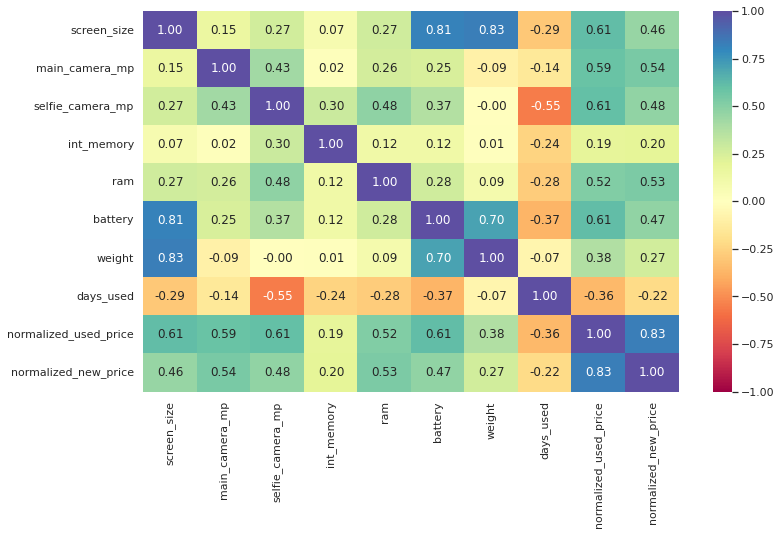

In [36]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:

*   `Normalized_used_price` is very strongly positively correlated with `normalized_new_price` (R$^2$ = 0.83)
*   `Normalized_used_price` also has strong positive correlations with `screen_size`, `selfie_camera_mp` and `battery` (R$^2$ = 0.61)
*   `Screen_size` is highly correlated with `battery` and `weight` (R$^2$ = 0.81 and 0.83 respectively)
*   `Selfie_camera_mp` is negatively correlated with `days_used` (R$^2$ = -0.55)
*   `Battery` is highly correlated with `weight` of devices(R$^2$ = 0.7)




### Q7. Which attributes are highly correlated with the normalized price of a used device?

Following attributes are highly correlated with the normalized price of a used device 
- `normalized_new_price` (R$^2$ = 0.83)
- `screen_size` (R$^2$ = 0.61)
- `selfie_camera_mp`(R$^2$ = 0.61)
- `battery` (R$^2$ = 0.61)
- `main_camera_mp` (R$^2$ = 0.59)
- `ram` (R$^2$ = 0.52)

`normalized_used_price` is also negatively correlated with `years_since_release`(R$^2$ = -0.51) [See discussion in Feature Engineering]

Brand Name vs Normalized Used Price

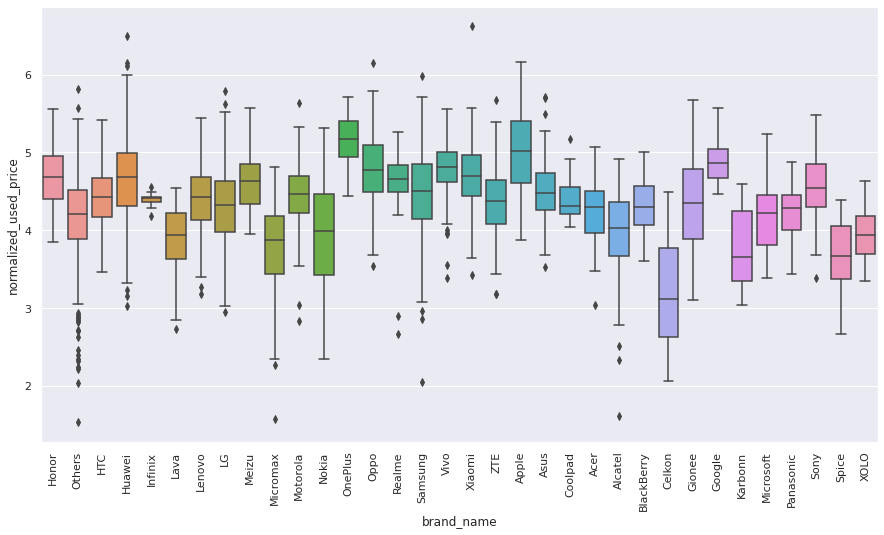

In [37]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="brand_name", y="normalized_used_price")
plt.xticks(rotation=90);

Observations:

*   Most brands have a median `normalized_used_price` between 4-5 euros
*   Few brands have higher median used prices (nearly 5 euros or greater) such as Apple, Google and OnePlus
* Few brands have lower median used prices (below 4 euros) such as Lava, Micromax, Celkon, Karbonn, Spice and Xolo)
* Brand 'Others' have a fair number of lower priced devices (below 3 euros) that are outliers 



Brand Name vs Normalized New Price

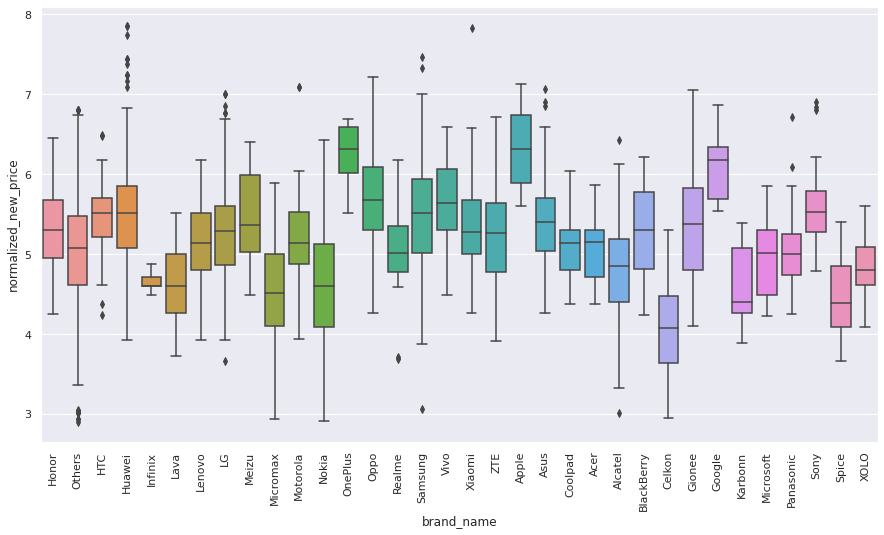

In [38]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="brand_name", y="normalized_new_price")
plt.xticks(rotation=90);

Observations:

*   Most brands have a median `normalized_new_price` between 5-6 euros
*   Few brands have higher median new prices (nearly 6 euros or greater) such as Apple, Google and OnePlus
* Few brands have lower median new prices (below 5 euros) such as Infinix, Lava, Micromax, Nokia, Alcatel, Celkon, Karbonn, Spice and Xolo
* Huawei have a fair number of higher priced devices (greater than 7 euros) that are outliers 

Brand Name vs Screen Size

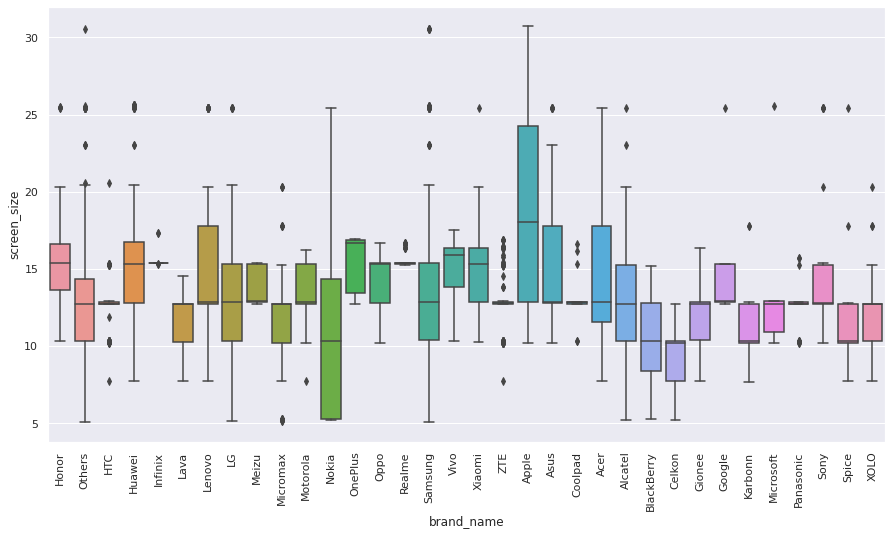

In [39]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="brand_name", y="screen_size")
plt.xticks(rotation=90);

Observations:

*   Most brands have a median `screen_size` between 10-15 cms
*   Few brands have higher median screen sizes such as Honor, Huawei, One Plus, Vivo, Xiaomi and Apple
* Although a no of brands offer a range of screen sizes, Apple (10-30+ cm) and Nokia (5-25+ cm) have a fairly wide range compared to most brands

Brand Name vs Weight

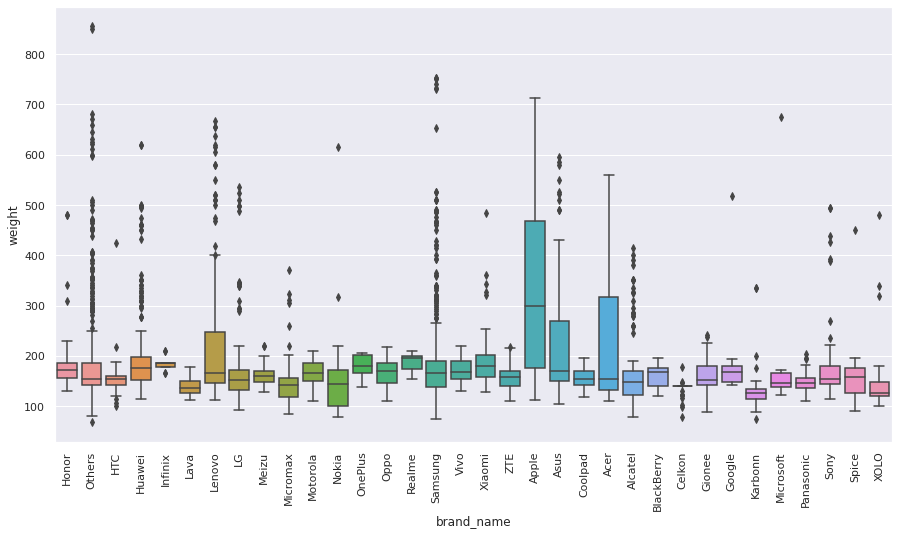

In [40]:
# all data
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="brand_name", y="weight")
plt.xticks(rotation=90);

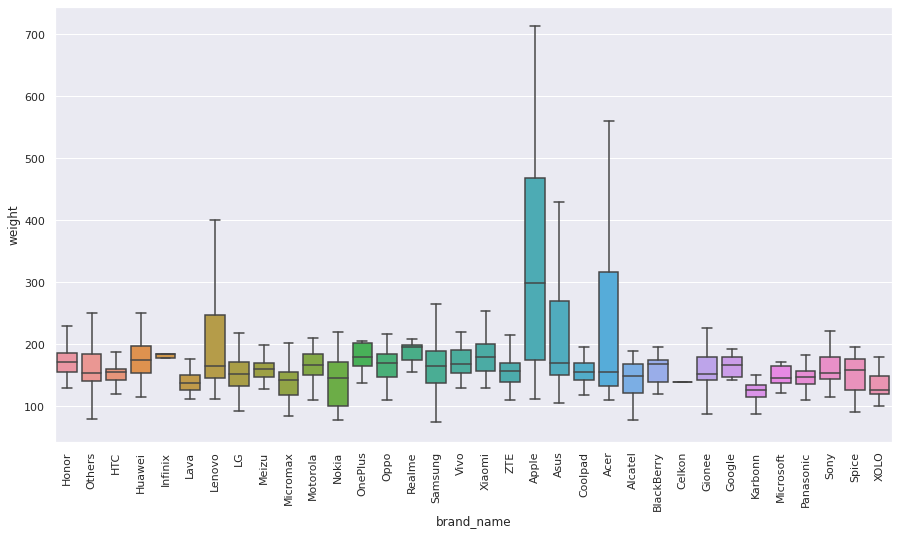

In [41]:
# data without outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="brand_name", y="weight",showfliers=False)
plt.xticks(rotation=90);

Observations:

*   Most brands have a median `weight` between 100-200 gms
* There are a no of outlier values on the heavier side for a large no of brands
* Only Apple devices are notably heavier with a median weight of 300 gms ignoring the outliers in other brands


Brand Name vs Battery

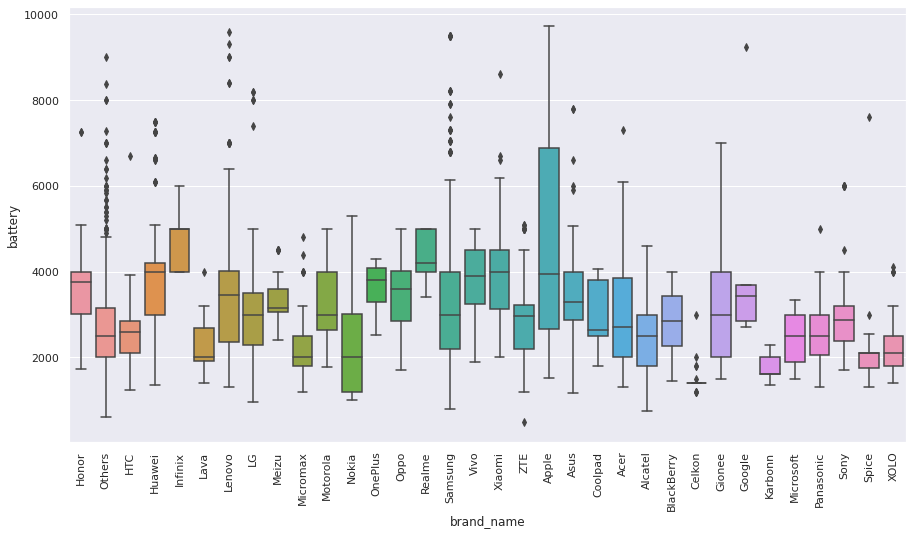

In [42]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="brand_name", y="battery")
plt.xticks(rotation=90);

Observations:

*   Most brands have a median `battery` energy capacity between 2000-4000 mAh
* There are a no of outlier values on the heavier side for several brands particularly Others, Lenovo and Samsung 
* Only Infinix and Realme devices have slightly heavier median battery energy capacity 

### Q4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [43]:
# dataframe with large batteries
df_large_battery= df[df['battery']>4500]

In [44]:
# No of devices with large battery
df_large_battery.shape[0]

341

In [45]:
print("Percentage of devices with large battery: ",round(((df_large_battery.shape[0]/df['battery'].count())*100),2))

Percentage of devices with large battery:  9.89


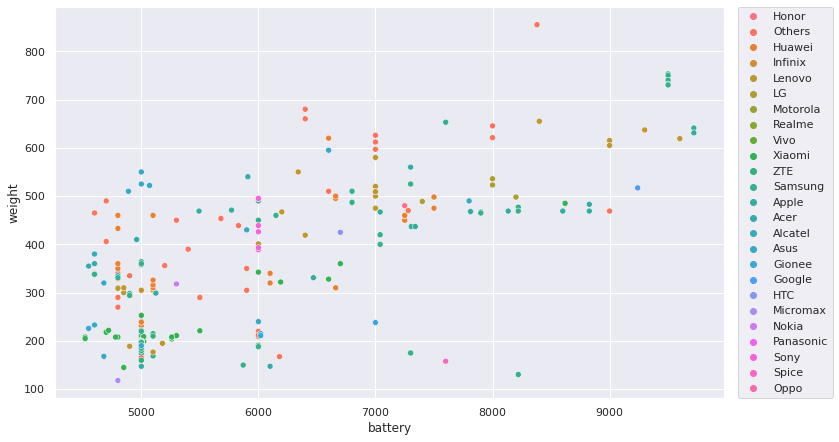

In [46]:
# Scatterplot showing variation in weight in devices with large batteries
plt.figure(figsize = (12,7.2))
sns.scatterplot(data=df_large_battery, x='battery', y='weight',hue='brand_name')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);


Observations:

*   There seems to be 341 used devices that have a large battery making up nearly 10% of all devices 
* Broadly weight seems to vary linearly with battery sizes for devices with large batteries (greater than 4500 mAh) across different brands
*   Devices can weigh between slightly more than 100 gms to slighly more than 800 gms for batteries ranging from 4500 mAh up to nearly 10000 mAH energy capacity



### Q3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

Brand Name vs Ram

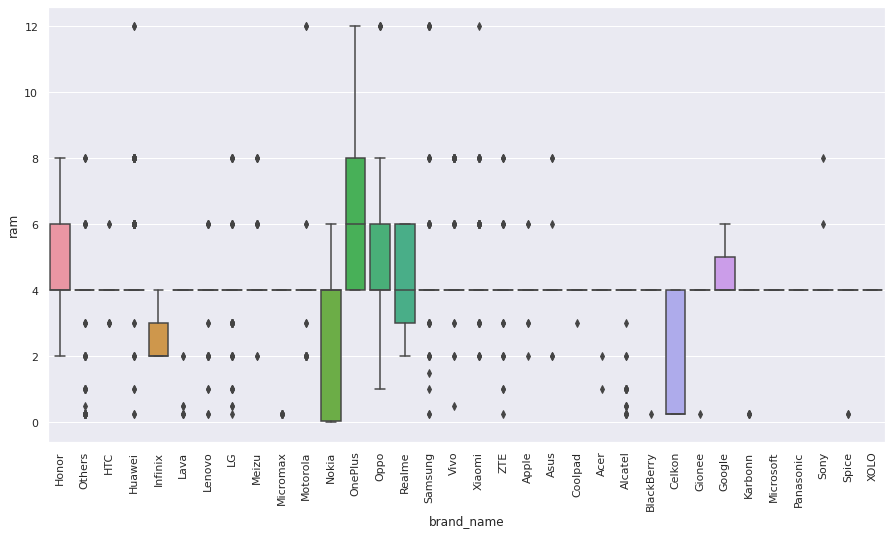

In [47]:
# Boxplot showing variation in RAM across brands
plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='brand_name', y='ram')
plt.xticks(rotation=90);

Observations:


*   Most devices across brands seem to most commonly have 4 GB RAM. 
*   Brands such as Nokia, Infinix, Celkon seem to more commonly offer RAM sizes lower than 4 GB than most brands

* Brands such as Honor, OnePlus, Oppo, Realme and Google seem to more commonly offer RAM sizes greater than 4 GB than most brands

* There are a number of outlier values both on the lower and upper side of 4 GB for most brands suggesting that most brands ocassionally offer RAM sizes greater or less than 4 GB in certain devices but its not common in most devices










Brand Name vs Int Memory

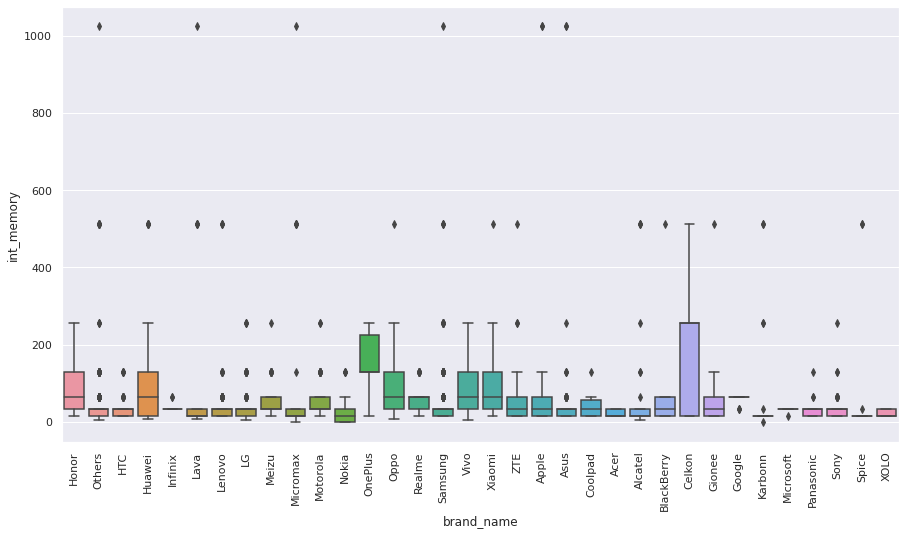

In [48]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="brand_name", y="int_memory")
plt.xticks(rotation=90);

Observations:

*   Most brands have a median `int_memory` between 0-200 GB
* There are outlier values with higher int_memory on nearly all brands

Brand Name vs Days Used

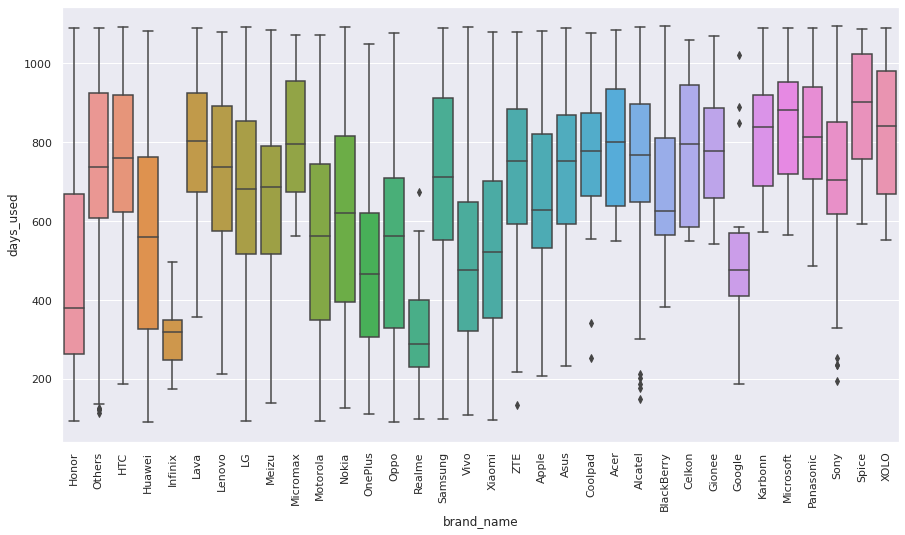

In [49]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="brand_name", y="days_used")
plt.xticks(rotation=90);

Observations:

*   Most brands have a median `days_used` between 600-800 days
*   Few brands have slightly higher median values such as Karbonn, Microsoft, Panasonic, Spice and XOLO
* Few brands have far lower median usage namely Google (slightly more than 400 days) and Infinix and Realme (below 400 days)


Brand Name Vs Camera Resolution



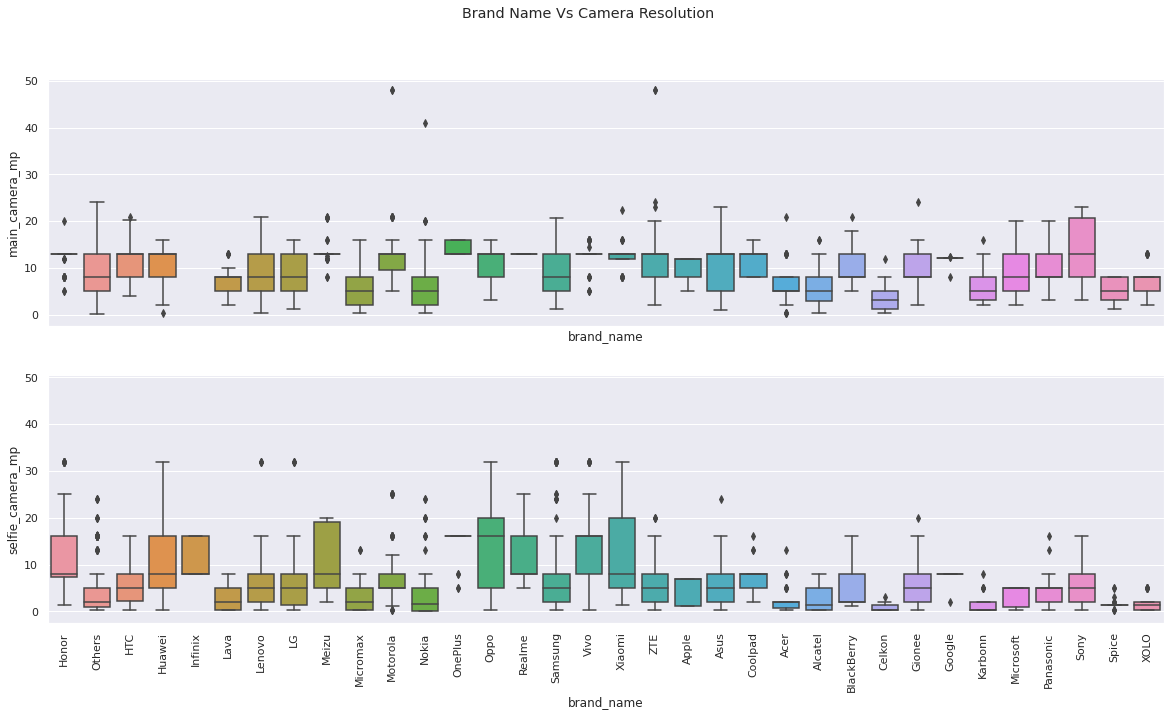

In [50]:
fig, axes = plt.subplots(2,1, figsize=(20, 10),sharex=True,sharey=True)
fig.suptitle("Brand Name Vs Camera Resolution")
sns.boxplot(data=df, x="brand_name", y="main_camera_mp",ax=axes[0])
sns.boxplot(data=df, x="brand_name", y="selfie_camera_mp",ax=axes[1])
plt.xticks(rotation=90);

Observations:

*   Most brands have median `main_camera_mp` below 15 MP and `selfie_camera_mp` below 10 MP
*   There are no of outlier values for higher main or selfie camera resolution for a no of brands
*   Some brands appear to have a wider range towards higher resolutions in their `selfie_camera_mp` compared to `main_camera_mp` such as Honor, Huawei, Oppo, Realme, Vivo and Xiaomi
*  This seems odd because generally main camera have better resolutions than selfie cameras. However in absence of additional evidence and the fact that this only appears across a few brands suggests these values should not be treated without taking a closer look at the data
*   Infinix seems to have no data for main camera resolution but has data for selfie camera resolution. 




#### Brands with higher selfie camera mp relative to main camera

*   Because main_camera_mp does have a number of missing values in the dataset, it may be useful to check if some of these brands also contains a fair amount of missing values for `main_camera_mp` that might bias the `selfie_camera_mp` resolutions to appear higher on average in absence of the true main camera resolutions
*   Let's check the data for some of the brands that appear to have a wider range towards elevated camera resolutions  in `selfie_camera_mp` relative to `mian_camera_mp`






In [51]:
check_brands =['Honor', 'Huawei', 'Oppo','Realme','Vivo','Xiami', 'Infinix']

df_check_brands = df[df['brand_name'].isin(check_brands)]

In [52]:
df_check_brands.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


In [53]:
df_check_brands.tail(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3404,Realme,Android,15.39,yes,no,NaN,8.0,64.0,6.0,4300.0,202.0,2020,231,4.800819,5.354934
3405,Realme,Android,16.36,yes,yes,NaN,8.0,128.0,6.0,4200.0,205.0,2020,141,5.259992,6.175327
3406,Realme,Android,15.37,yes,no,NaN,5.0,32.0,2.0,5000.0,195.0,2020,279,4.465218,4.665324
3407,Realme,Android,16.69,yes,yes,NaN,8.0,64.0,6.0,4200.0,202.0,2020,282,4.912802,5.318071
3408,Realme,Android,16.56,yes,no,NaN,8.0,32.0,3.0,5000.0,195.0,2020,113,4.377265,4.779039
3409,Realme,Android,15.37,yes,no,NaN,13.0,64.0,4.0,5000.0,198.0,2019,293,4.487737,4.967380
3410,Realme,Android,15.37,yes,no,NaN,16.0,64.0,6.0,4000.0,199.0,2019,181,4.895598,5.901047
3411,Realme,Android,15.34,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753


In [54]:
df_check_brands.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,664.0,15.222846,2.911217,7.750000,12.830000,15.370000,16.337500,25.600000
main_camera_mp,584.0,11.221575,3.148001,0.300000,8.000000,13.000000,13.000000,20.000000
selfie_camera_mp,664.0,12.301054,8.905218,0.300000,5.000000,8.000000,16.000000,32.000000
int_memory,664.0,80.487952,73.202481,4.000000,32.000000,64.000000,128.000000,512.000000
ram,664.0,4.664157,1.723532,0.250000,4.000000,4.000000,6.000000,12.000000
battery,664.0,3712.597892,1064.013393,1350.000000,3020.000000,4000.000000,4200.000000,7500.000000
weight,664.0,186.990964,65.642404,110.000000,155.000000,173.000000,194.250000,620.000000
release_year,664.0,2017.661145,2.145801,2013.000000,2016.000000,2018.000000,2019.000000,2020.000000
days_used,664.0,511.569277,255.345219,91.000000,289.000000,476.500000,692.500000,1092.000000
normalized_used_price,664.0,4.690084,0.479661,2.667228,4.402625,4.719434,5.001140,6.500448


In [55]:
df_check_brands.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           80
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

Observations:

*   It appears that some devices indeed have higher selfie camera mp compared to main camera mp
*   It also appears that 80 devices have missing values for main camera mp in these brands
* Roughly 45% of all the missing values for main camera mp are contained in these 6 brands
* Mean selfie camera resolution is higher than mean main camera resolution although the median is lower indicating presence of higher values for selfie camera that affects the mean



We will take a look at those devices where selfie camera mp is higher than main camera mp within these brands

In [56]:
# Find devices where selfie camera mp is higher than main camera mp
df_better_selfie =df_check_brands[df['selfie_camera_mp']>df['main_camera_mp']]

In [57]:
df_better_selfie.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,5.383256,6.213968
13,Honor,Android,15.32,yes,no,13.0,16.0,64.0,4.0,4000.0,171.5,2019,336,4.617593,5.398751
16,Honor,Android,15.90,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,2019,395,5.022366,5.517935


In [58]:
df_better_selfie.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,226.0,15.802566,1.173327,12.700000,15.340000,15.90000,16.590000,20.320000
main_camera_mp,226.0,12.188053,1.808324,8.000000,13.000000,13.00000,13.000000,16.000000
selfie_camera_mp,226.0,20.657080,6.389809,14.500000,16.000000,16.00000,25.000000,32.000000
int_memory,226.0,125.734513,82.977268,32.000000,64.000000,128.00000,128.000000,512.000000
ram,226.0,5.504425,1.799377,4.000000,4.000000,4.00000,8.000000,12.000000
battery,226.0,3883.362832,460.100686,2850.000000,3500.000000,4000.00000,4076.250000,5000.000000
weight,226.0,182.109956,23.519100,139.000000,164.250000,182.00000,196.000000,300.000000
release_year,226.0,2018.716814,0.928263,2016.000000,2018.000000,2019.00000,2019.000000,2020.000000
days_used,226.0,411.438053,184.047260,91.000000,275.250000,380.50000,499.000000,1049.000000
normalized_used_price,226.0,5.012270,0.340795,3.847804,4.805043,4.97449,5.176133,6.500448


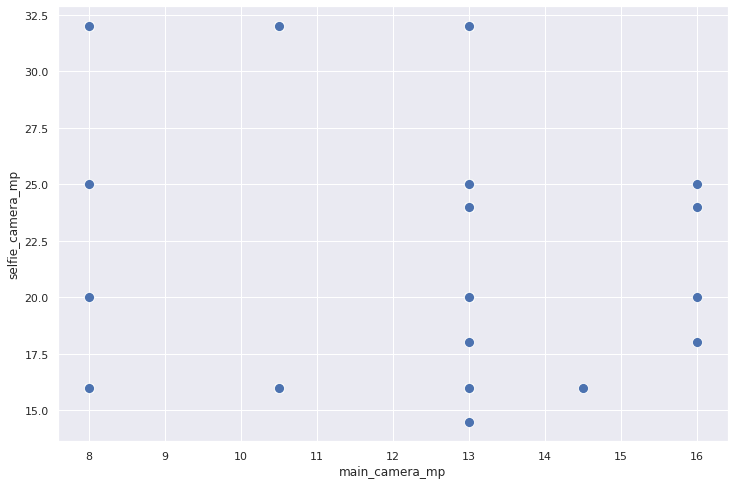

In [59]:
# Scatterplot of selfie_camera_mp vs main_camera_mp where selfie_camera mp have a higher resolution
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_better_selfie, x='main_camera_mp', y='selfie_camera_mp',s=100)
plt.show()

Observations:


*   There appears to be 226 devices just within these few brands that have higher `selfie_camera_mp` relative to `main_camera_mp`
*   This is a fairly large no of devices (~6.5% of all used devices) to have better selfie camera resolutions simply in the dataset by mistake. So it seems these values should not be treated and **instead simply taken to be part of the natural variation in the dataset**
* There are 80 missing values in `main_camera_mp` that could bias the `selfie_camera_mp` resolution ranges in these brands to appear higher without the knowledge of the true main camera mp for the missing values. The missing values will be treated later in the dataset



### Q6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

Brand Name vs High quality selfie cameras

In [60]:
df_8MP=df[df['selfie_camera_mp']>8]

In [61]:
df_8MP.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,655,25,Huawei,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,655,2,Android,653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,655.0,NaN,NaN,NaN,15.376595,1.461576,5.28,15.27,15.37,16.28,20.35
4g,655,2,yes,653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,655,2,no,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,535.0,NaN,NaN,NaN,12.138692,4.449784,0.3,10.5,13.0,13.0,48.0
selfie_camera_mp,655.0,NaN,NaN,NaN,18.75084,6.324722,9.0,16.0,16.0,20.0,32.0
int_memory,655.0,NaN,NaN,NaN,109.874809,82.725308,8.0,64.0,128.0,128.0,1024.0
ram,655.0,NaN,NaN,NaN,5.273282,1.977736,1.0,4.0,4.0,6.0,12.0
battery,655.0,NaN,NaN,NaN,3885.78626,643.12813,1470.0,3400.0,4000.0,4200.0,6000.0


In [62]:
print("No of devices offering selfie_camera_mp greater than 8MP:",df_8MP['selfie_camera_mp'].shape[0])

print("\n Percentage of devices offering selfie_camera_mp greater than 8MP:",round((df_8MP['selfie_camera_mp'].shape[0]/df['selfie_camera_mp'].shape[0]*100),2))

No of devices offering selfie_camera_mp greater than 8MP: 655

 Percentage of devices offering selfie_camera_mp greater than 8MP: 18.96


In [63]:
print("No of brands offering selfie_camera_mp greater than 8MP:",df_8MP['brand_name'].nunique())

print("\n Percentage of brands offering selfie_camera_mp greater than 8MP:",round((df_8MP['brand_name'].nunique()/df['brand_name'].nunique()*100),2))

No of brands offering selfie_camera_mp greater than 8MP: 25

 Percentage of brands offering selfie_camera_mp greater than 8MP: 73.53


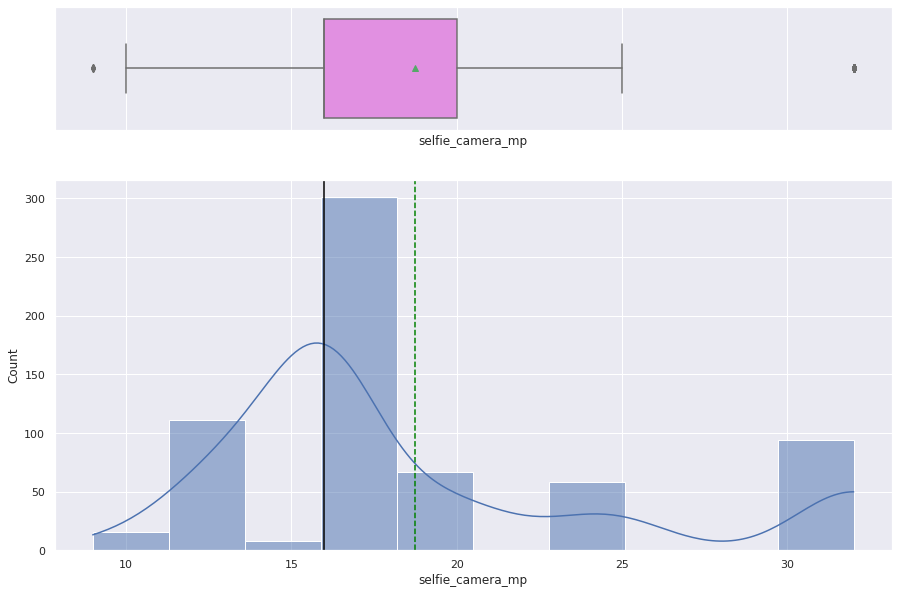

In [64]:
histogram_boxplot(df_8MP,'selfie_camera_mp', kde=True,bins=10)

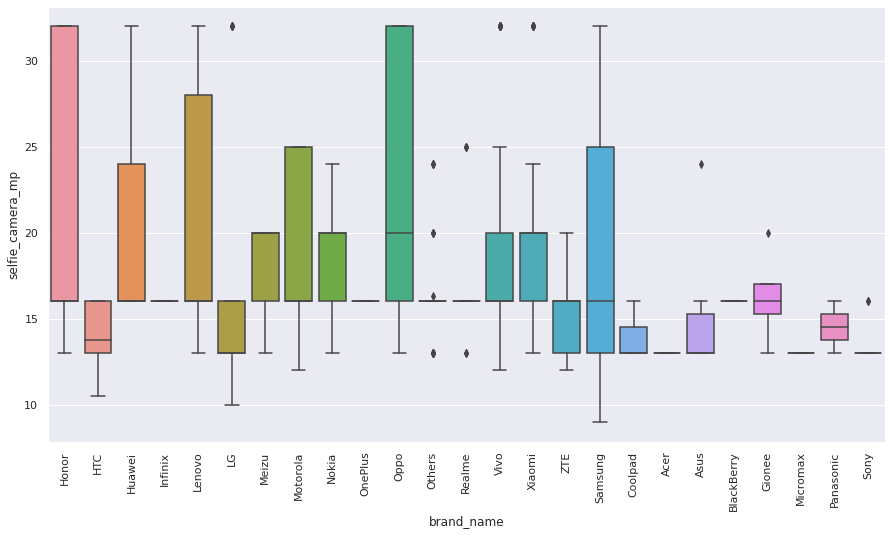

In [65]:
# Boxplot showing devices with greater than 8MP across brands
plt.figure(figsize = (15,8))
sns.boxplot(data=df_8MP, x='brand_name', y='selfie_camera_mp')
plt.xticks(rotation=90);

Observations/Insights:

* Distribution of devices with greater than 8MP selfie cameras still appear to be right skewed albeit to a lesser extent compared to the distribution of selfie camera mp with all devices
* There still appears to be some outlier values on the right forming a fatter tail with some devices having very high resolution selfie cameras 
*   Although the percentage of devices with selfie camera MP greater than 8 MP is only ~20%, percentage of brands offering such devices is 73.5 %
*   This suggests that most brands offer high quality selfie camera MP in some of their products but not in most products

Os vs Normalized Used Price

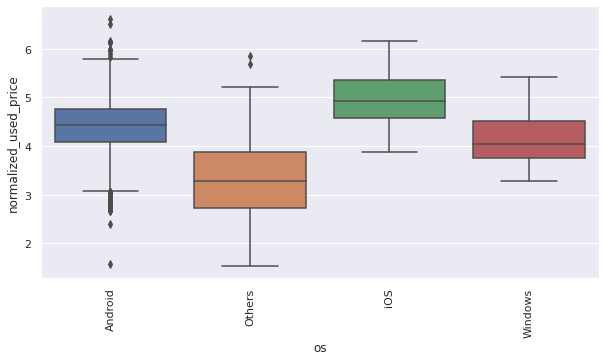

In [66]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="os", y="normalized_used_price")
plt.xticks(rotation=90);

Observations:

*   iOs devices have the highest median used price (nearly 5 euros) while others have the lowest median used price (slightly more than 3 euros)
*   Android devices have a wide range of prices from below 2 euros going up to more than 6 euros with a median price around 4.5 euros




Os vs Normalized New Price

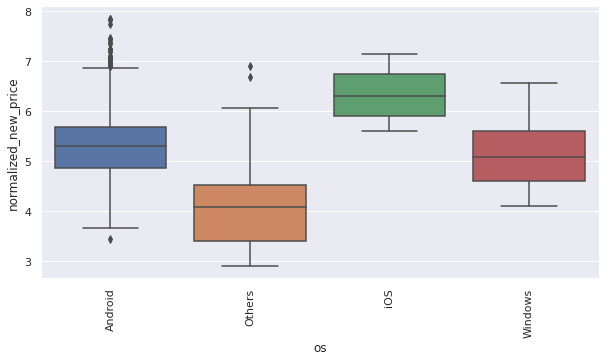

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="os", y="normalized_new_price")
plt.xticks(rotation=90);

Observations:

*   iOs devices have the highest median new price (6+ euros) while others have the lowest median new price (nearly 4 euros)
*   Android devices have a wide range of prices from 3.5 euros going up to nearly 8 euros with a median price around 5.4 euros

Os vs Days Used

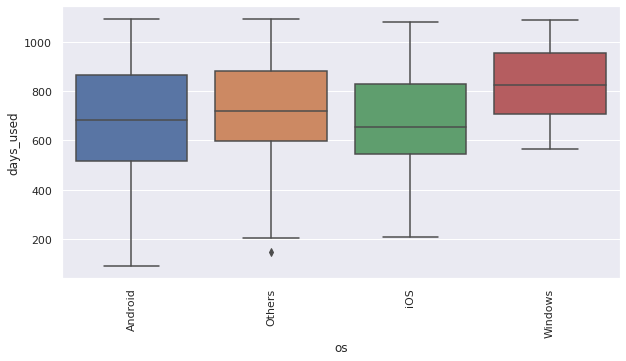

In [68]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="os", y="days_used")
plt.xticks(rotation=90);

Most devices independent of the Os its running on have a similar median days of usage of approximately 650-700 days with windows devices having slightly higher usage

Os vs Battery

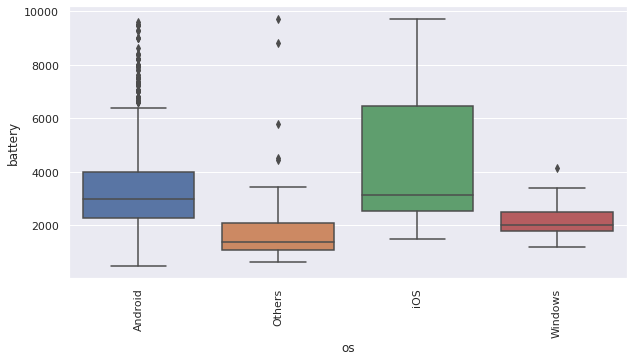

In [69]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="os", y="battery")
plt.xticks(rotation=90);

Median battery energy capacity for most Os is between 2000-4000 mAh with iOs and Android slightly higher than Windows and Others

Effect of 4G and 5G availability on Price and Usage

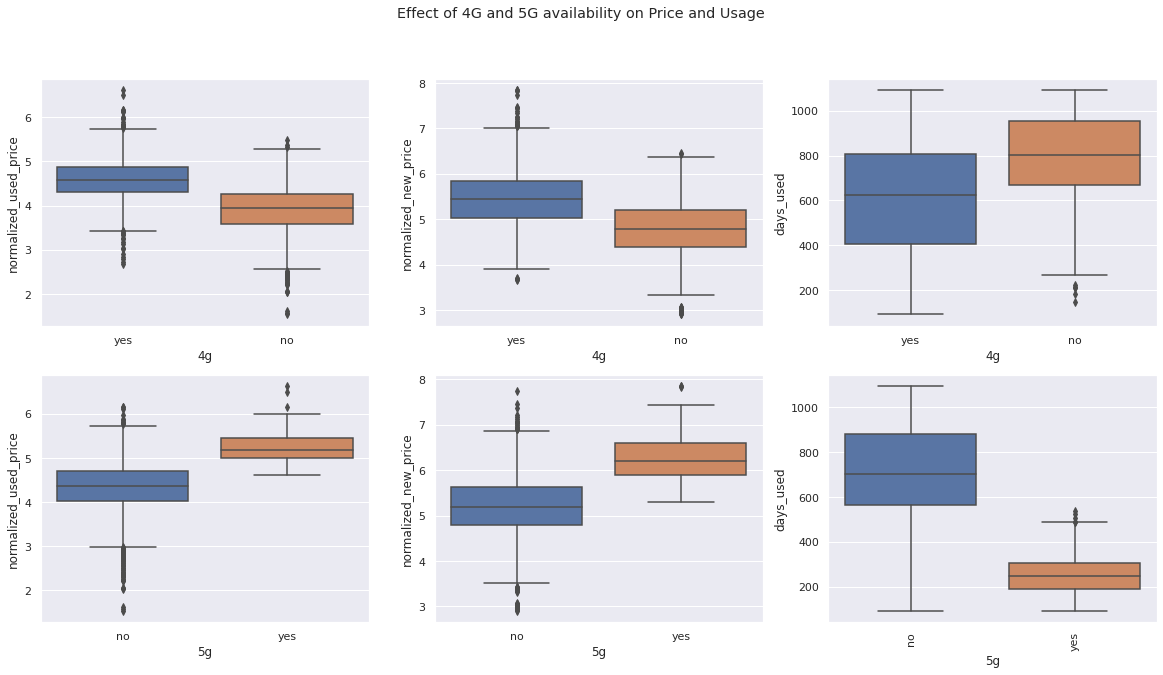

In [70]:
fig, axes = plt.subplots(2,3, figsize=(20, 10))
fig.suptitle("Effect of 4G and 5G availability on Price and Usage")
sns.boxplot(ax=axes[0,0],data=df, x="4g", y="normalized_used_price")
sns.boxplot(ax=axes[0,1],data=df, x="4g", y="normalized_new_price")
sns.boxplot(ax=axes[0,2],data=df, x="4g", y="days_used")
sns.boxplot(ax=axes[1,0],data=df, x="5g", y="normalized_used_price")
sns.boxplot(ax=axes[1,1],data=df, x="5g", y="normalized_new_price")
sns.boxplot(ax=axes[1,2],data=df, x="5g", y="days_used")
plt.xticks(rotation=90);

Observations:

*   Devices with 4g availabilty have higher median used and new prices but are used fewer no of days compared to devices without 4g
*   Devices with 5g availabilty have higher median used and new prices but are used much lesser no of days compared to devices without 5g (The much lower usage days may be a result that 5G availability wasn't common in earlier models and only became common in recent years)



Release Year Vs Normalized Used Price

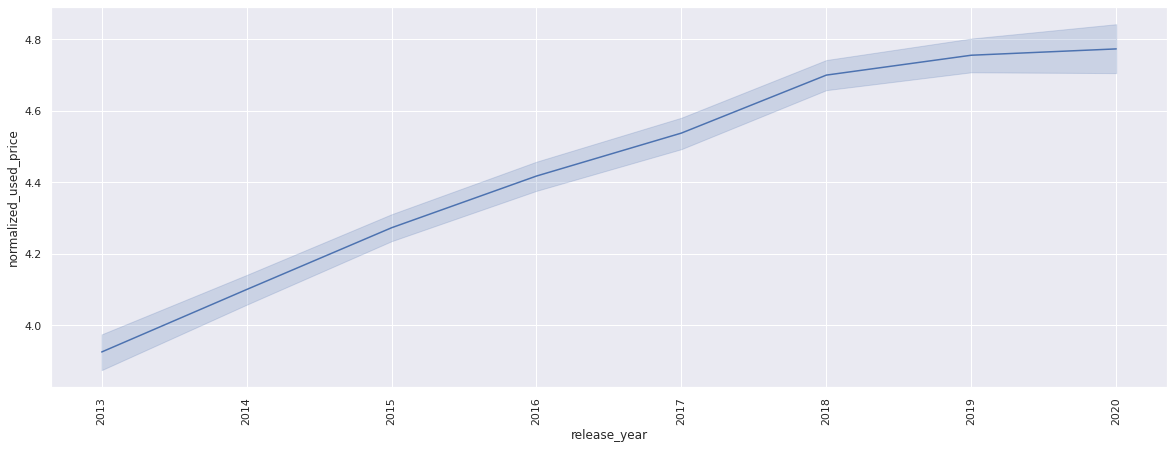

In [71]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x="release_year", y="normalized_used_price")
plt.xticks(rotation=90);

Normalized used prices seem to broadly increase with increasing year of release though the price flattens somewhat between 2018 to 2020

Release Year Vs Normalized New Price

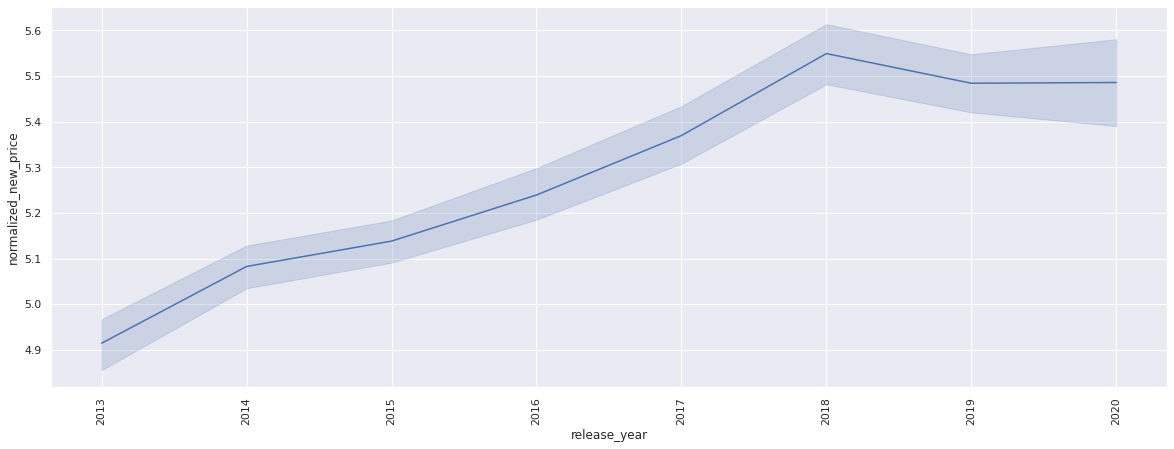

In [72]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x="release_year", y="normalized_new_price")
plt.xticks(rotation=90);

Normalized new prices seem to broadly increase with increasing year of release reaching a inflection point at 2018 after which it dropped and then stayed the same between 2018 to 2020

Release Year Vs Screen Size

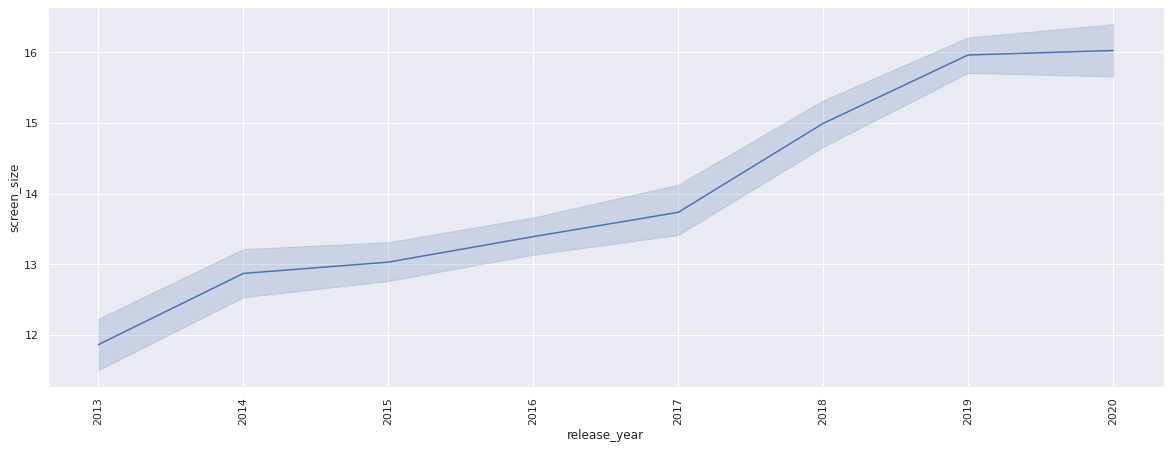

In [73]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x="release_year", y="screen_size")
plt.xticks(rotation=90);

Screen size in used devices have generally increased with increasing year of release but the sharpest increase happened between years 2017 and 2019 

Release Year Vs Camera Resolution

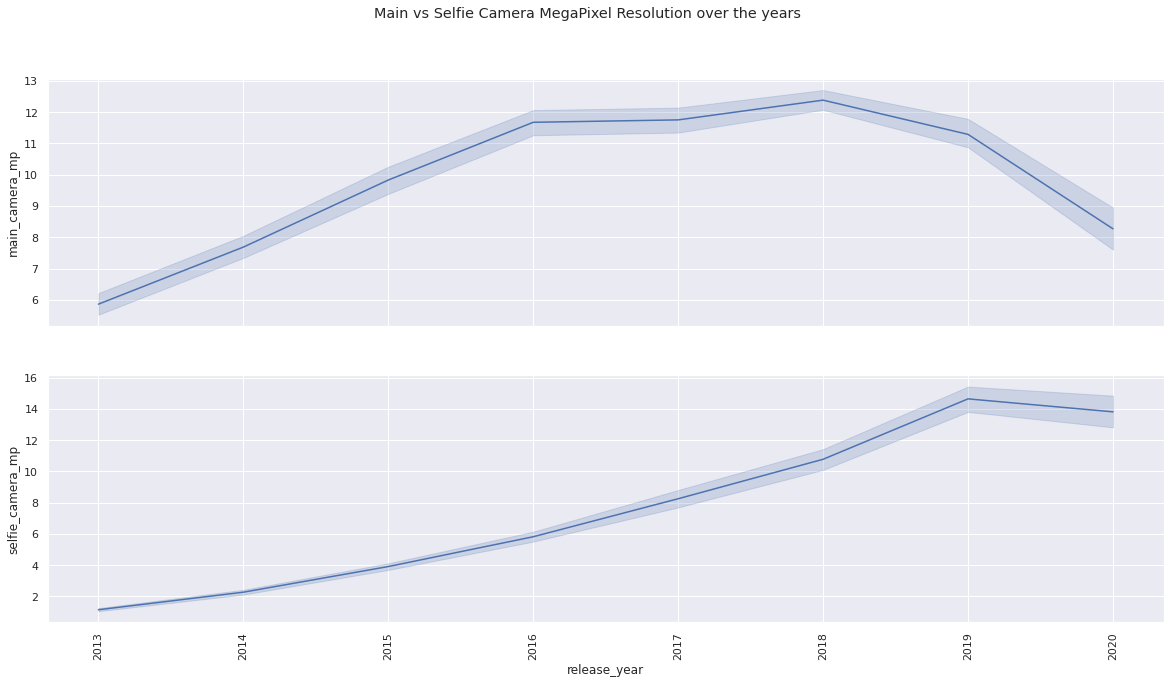

In [74]:
fig, axes = plt.subplots(2,1, figsize=(20, 10),sharex=True)
fig.suptitle("Main vs Selfie Camera MegaPixel Resolution over the years")
sns.lineplot(data=df, x="release_year", y="main_camera_mp",ax=axes[0])
sns.lineplot(data=df, x="release_year", y="selfie_camera_mp",ax=axes[1])
plt.xticks(rotation=90);

*   Camera resolutions for front (selfie) and rear (main) facing cameras in used devices have generally gone up with increasing year of release
*   However while the resolution of main camera have started going down from 2018 the selfie camera resolution camera have kept going up



Release Year Vs Battery

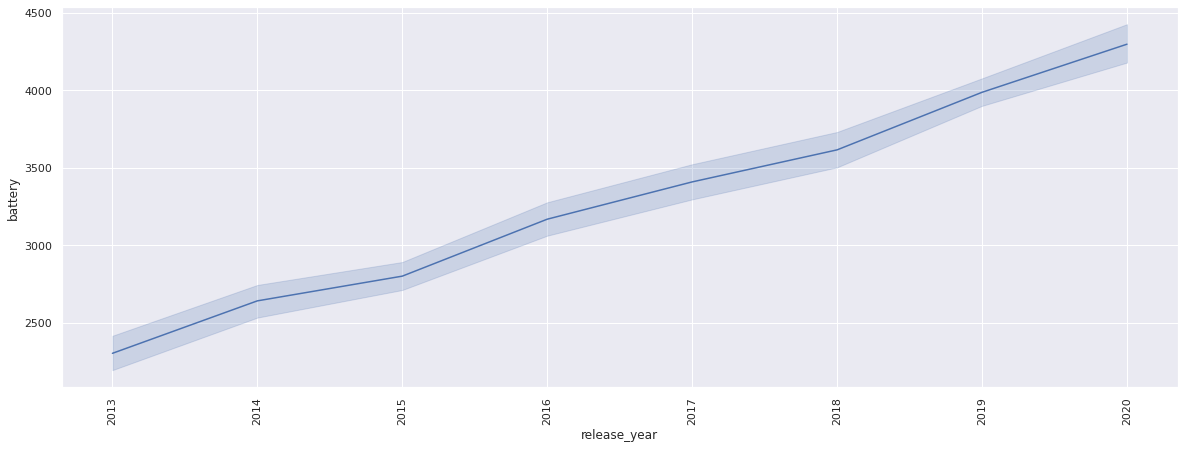

In [75]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x="release_year", y="battery")
plt.xticks(rotation=90);

Battery energy capacity have grown steadily with increasing year of release. This is likely consistent with higher camera resolutions, development of numerous apps etc in newer smartphones that consume greater battery power

Release Year Vs Weight

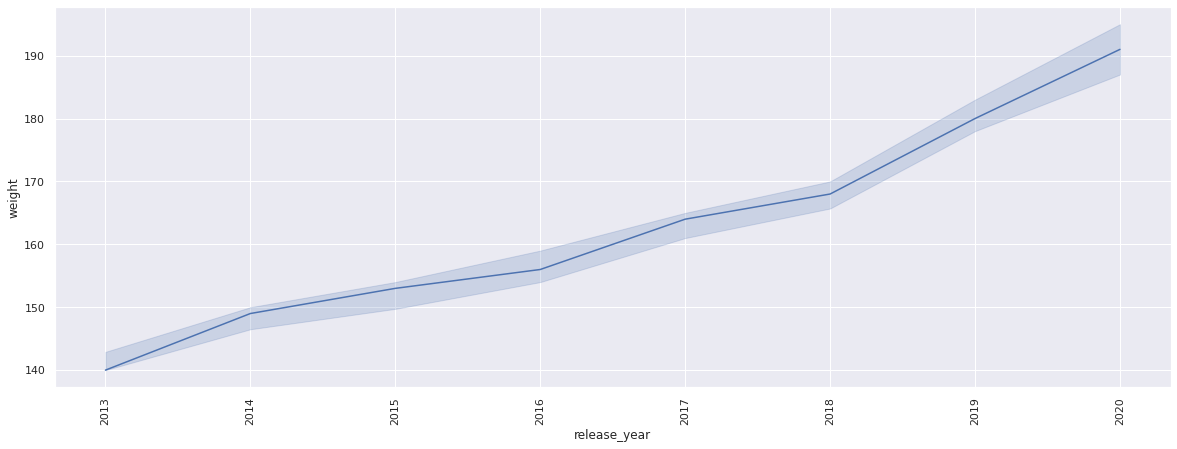

In [76]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x="release_year", y="weight",estimator=np.median)
plt.xticks(rotation=90);

Weight of used devices have grown steadily with increasing year of release with a sharper change noticed between 2018-2020. This is in part related to introduction of larger batteries in newer smartphones

Release Year Vs Days Used

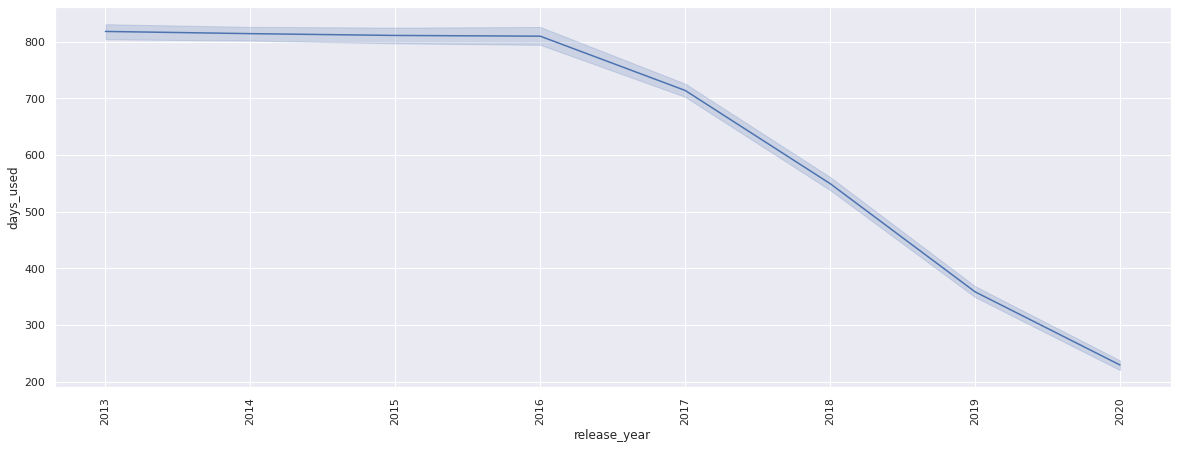

In [77]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x="release_year", y="days_used")
plt.xticks(rotation=90);

*   Broadly older release year devices have been used longer relative to younger release year devices
*   Devices released between 2013-2016 plateau usage around 800 days suggesting that users likely want to switch devices or buy new/used devices after they have reached usage days of slightly more than 2 years
* Devices released between 2016 to 2020 have been used in decreasing order from their year of release (this is likely partly a function of the fact that fewer days since release year would naturally mean fewer days of usage)



## Key Questions Summary

Detailed explanations for the answers for the following key questions have been provided earlier in EDA. This is a summary of the same

#### **Questions**:

Q1. What does the distribution of normalized used device prices look like?
> Normalized used device price shows an approximately normal distribution which is slightly left skewed due to the presence of a greater number of outliers on the left of the distribution relative to the right

<br>

Q2. What percentage of the used device market is dominated by Android devices?
> Android devices dominates the used device market with a whopping **93.1%** used devices running on Android OS

<br>

Q3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
> -   Most devices across brands seem to most commonly have 4 GB RAM. 
> -   Brands such as Nokia, Infinix, Celkon seem to more commonly offer RAM sizes lower than 4 GB than most brands
>- Brands such as Honor, OnePlus, Oppo, Realme and Google seem to more commonly offer RAM sizes greater than 4 GB than most brands
>- There are a number of outlier values both on the lower and upper side of 4 GB for most brands suggesting that most brands ocassionally offer RAM sizes greater or less than 4 GB in certain devices but its not common in most devices

<br>

Q4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
>- There seems to be 341 used devices that have a large battery making up nearly 10% of all devices 
>- Broadly weight seems to vary linearly with battery sizes for devices with large batteries (greater than 4500 mAh) across different brands
>- Devices can weigh between slightly more than 100 gms to slighly more than 800 gms for batteries ranging from 4500 mAh up to nearly 10000 mAH energy capacity

<br>

Q5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
>- **1099** devices of the dataset have larger than six inches of screen size
>- These devices make up ~ **32%** of the total devices of the used devices dataset

<br>

Q6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
>- Distribution of devices with greater than 8MP selfie cameras still appear to be right skewed albeit to a lesser extent compared to the distribution of selfie camera mp with all devices
>- There still appears to be some outlier values on the right forming a fatter tail with some devices having very high resolution selfie cameras 
>- Although the percentage of devices with selfie camera MP greater than 8 MP is only ~20%, percentage of brands offering such devices is 73.5 %
>- This suggests that most brands offer high quality selfie camera MP in some of their products but not in most products

<br>

Q7. Which attributes are highly correlated with the normalized price of a used device?
>Following attributes are highly correlated with the normalized price of a used device 
>- `normalized_new_price` (R$^2$ = 0.83)
>- `screen_size` (R$^2$ = 0.61)
>- `selfie_camera_mp`(R$^2$ = 0.61)
>- `battery` (R$^2$ = 0.61)
>- `main_camera_mp` (R$^2$ = 0.59)
>- `ram` (R$^2$ = 0.52)
>- `normalized_used_price` is also negatively correlated with `years_since_release`(R$^2$ = -0.51) [See discussion in Feature Engineering]

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [78]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [79]:
# we first create a copy of the data to avoid changes to it
df_final = df.copy()

Let's fix the missing values in the data.

- For the variables `main_camera_mp`, `selfie_camera_mp`, `int_memory`, `ram`, `battery` and `weight`, we will impute the missing values in each column with the median grouped by `brand_name` and `release_year` as both the columns have skewed distributions

In [80]:
missing_value_columns = ['main_camera_mp','selfie_camera_mp', 'int_memory','ram', 'battery','weight']


for col in missing_value_columns:
  df_final[col]=df_final[col].fillna(value=df_final.groupby(["brand_name","release_year"])[col].transform("median"))

df_final.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

As there are still missing values left in `main_camera_mp`, `selfie_camera_mp`, `battery` and `weight`, we will try to impute missing values in each column with median values grouped by `brand_name` alone

In [81]:
still_missing = ['main_camera_mp','selfie_camera_mp','battery','weight']


for col in still_missing:
  df_final[col]=df_final[col].fillna(value=df_final.groupby(["brand_name"])[col].transform("median"))

df_final.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

As there are still missing values left in `main_camera_mp`, we will try to impute the remaining missing values with median values for `main_camera_mp`

In [82]:
df_final['main_camera_mp']=df_final['main_camera_mp'].fillna(value=df_final['main_camera_mp'].median())

df_final.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

All missing values have been treated

### Feature Engineering


*   It may make more sense to use the number of years since the release of a device as a numeric predictor variable rather than the absolute value of year of release

*   We will be treating the release_year variable by subtracting it from 2021, the year this data was collected





In [83]:
df_final['years_since_release']=2021-df_final['release_year']
df_final.drop('release_year',axis=1, inplace=True)
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.617597,4.749438,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3454.0,6.555067,6.968440,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3454.0,54.528474,84.934991,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3454.0,4.032620,1.368598,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3454.0,3132.577446,1298.884193,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3454.0,182.636856,88.360445,69.000000,142.000000,160.000000,185.000000,855.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433
normalized_new_price,3454.0,5.233107,0.683637,2.901422,4.790342,5.245892,5.673718,7.847841


Let's check the correlations one more time to see how our feature engineered variable `years_since_release` correlates with other numeric variables

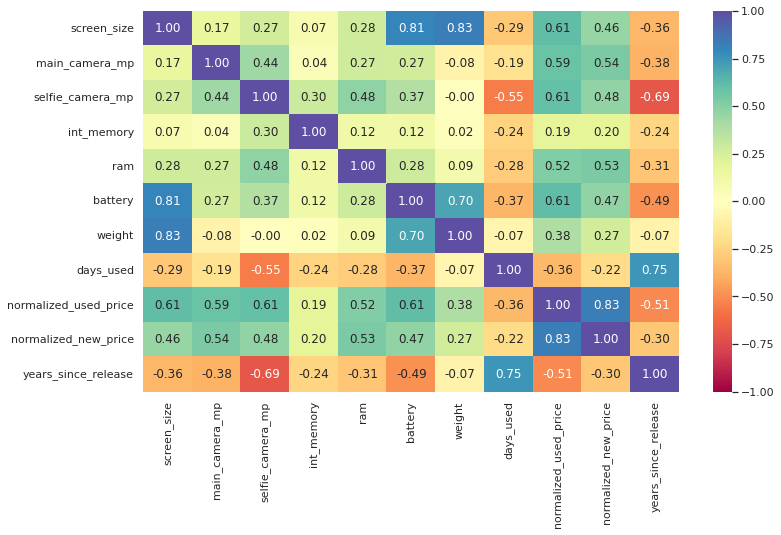

In [84]:
# creating a list of numerical columns
num_cols = df_final.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df_final[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:

*   `years_since_release` is negatively correlated with `normalized_used_price` (R$^2$ = - 0.51)
*   `years_since_release` is strongly neagtively correlated with `selfie_camera_mp` (R$^2$ = - 0.69)
*   `years_since_release` is highly correlated with `days_used` (R$^2$ = 0.75)


### Outlier Detection

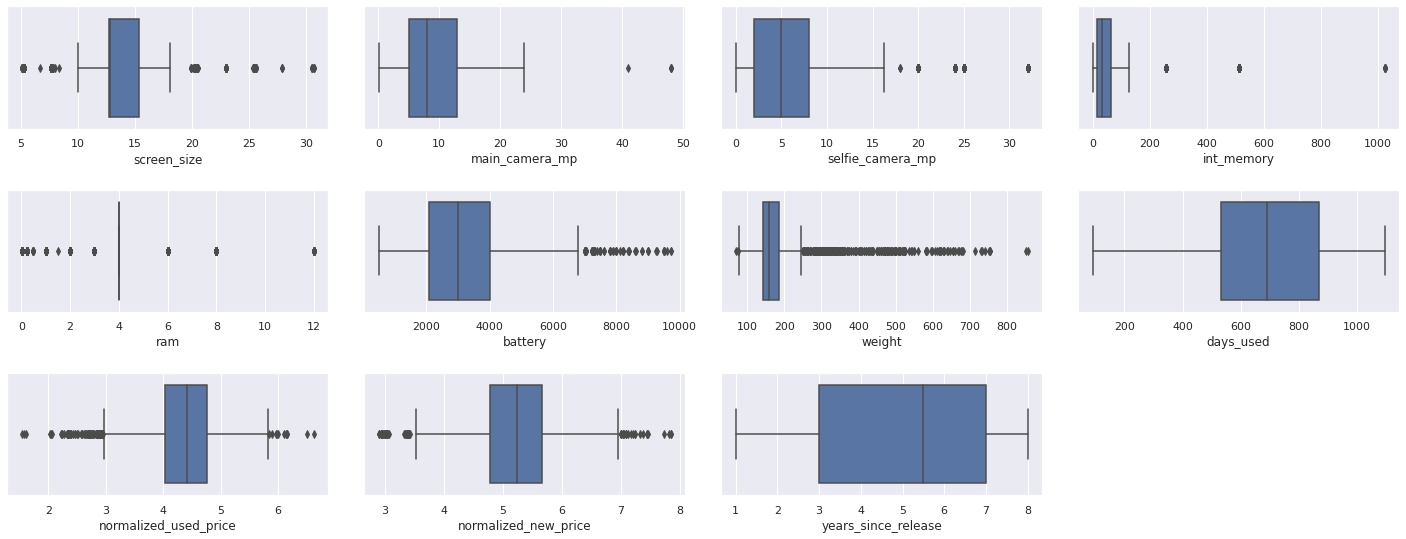

In [85]:
#Boxplots showing outliers in all numerical variables
plt.figure(figsize=(20, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df_final, x=variable)
    plt.tight_layout(pad=2)

plt.show()

Observations:

*   There are a large number of outliers on a number of variables 
*   However, all the outliers seem to represent accurate data and are reasonable values for the variables concerned 
* Because the outliers represent the natural variability in the dataset, we wont be either treating or removing the outliers, which might change the predictive capability of the ML model we will be proposing
* NOTE: See the discussion/justification in EDA section of why outlier values in selfie_camera_mp were not treated



### Data Preparation for modeling

- We want to predict the normalized_used_price
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [86]:
# defining X and y variables
X = df_final.drop(["normalized_used_price"], axis=1)
y = df_final["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [87]:
# let's add the intercept to data
X = sm.add_constant(X)

In [88]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [89]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [90]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

- We will mainly focus on the variables that were treated 

Main Camera MP

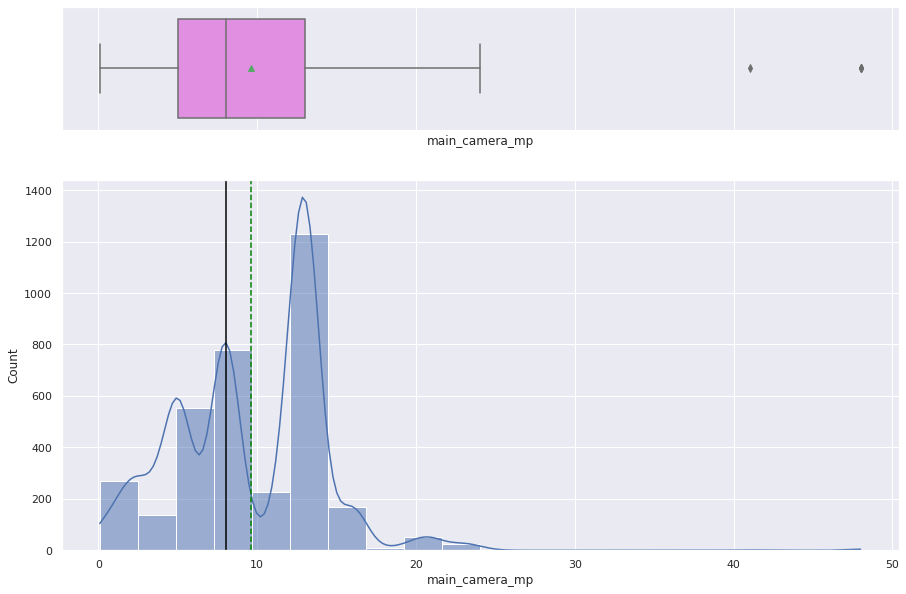

In [91]:
histogram_boxplot(df_final,'main_camera_mp', kde=True, bins=20)

Selfie Camera Mp

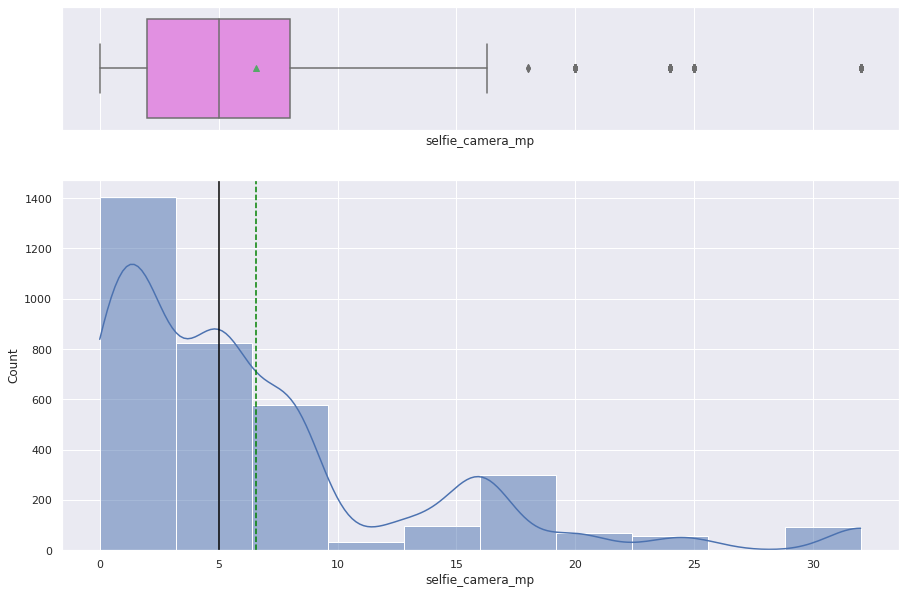

In [92]:
histogram_boxplot(df_final,'selfie_camera_mp', kde=True, bins=10)

Int Memory

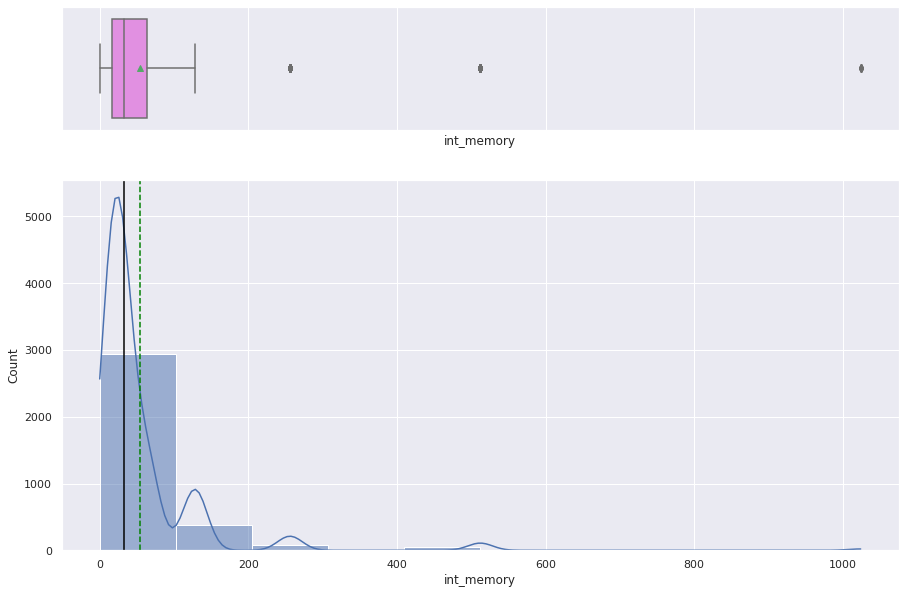

In [93]:
histogram_boxplot(df_final,'int_memory', kde=True, bins=10)

RAM

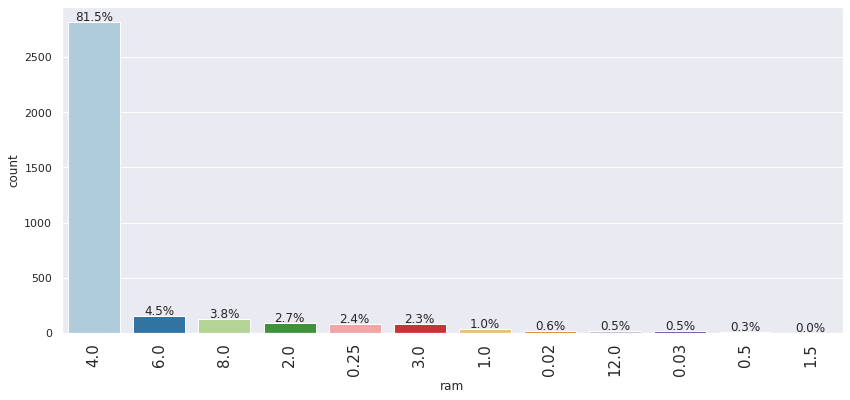

In [94]:
labeled_barplot(df_final, "ram", perc=True)

Battery

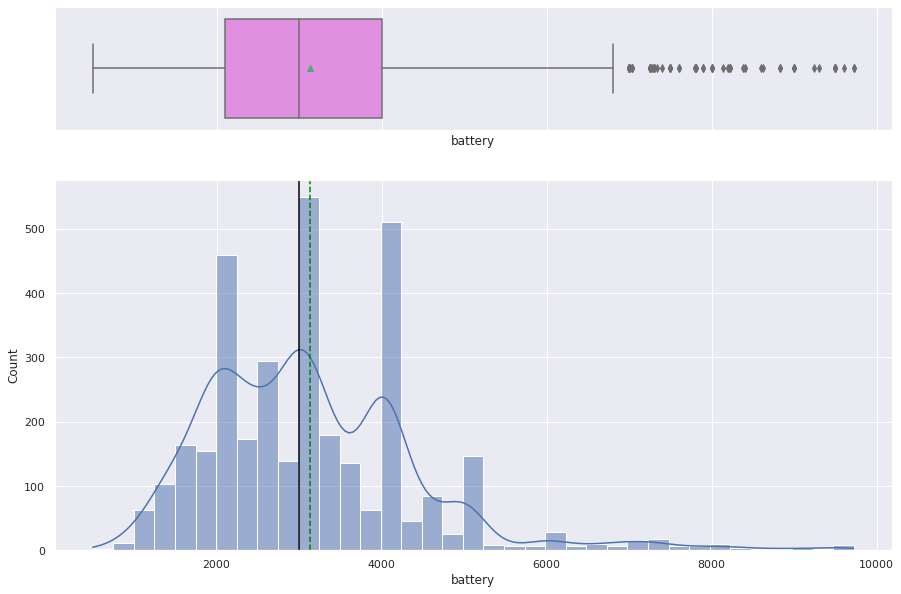

In [95]:
histogram_boxplot(df_final,'battery', kde=True)

Weight

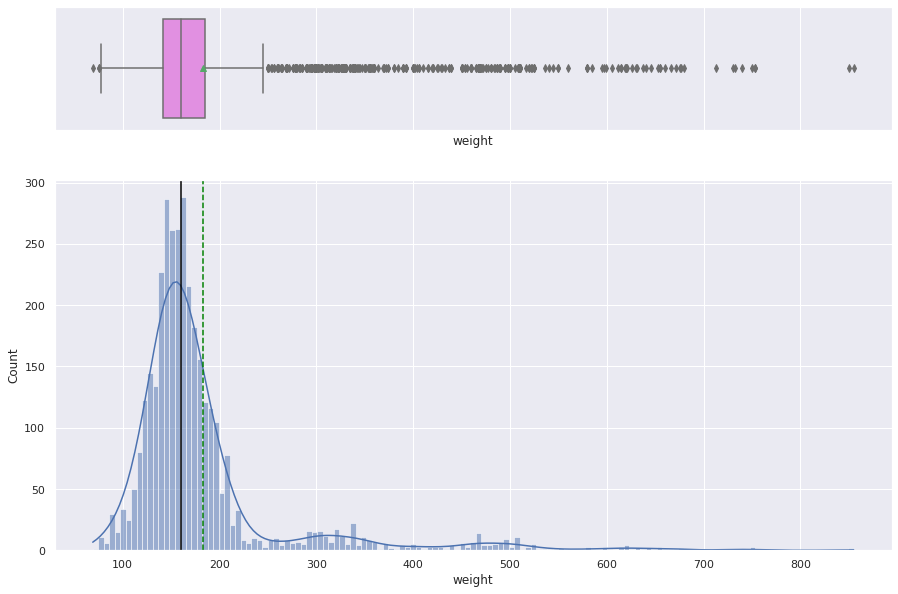

In [96]:
histogram_boxplot(df_final,'weight', kde=True)

Observations:

A major noticeable change does not seem to have arisen in the overall distributions in any of these numeric variables that were treated for missing values

Brand name vs Camera Resolutions

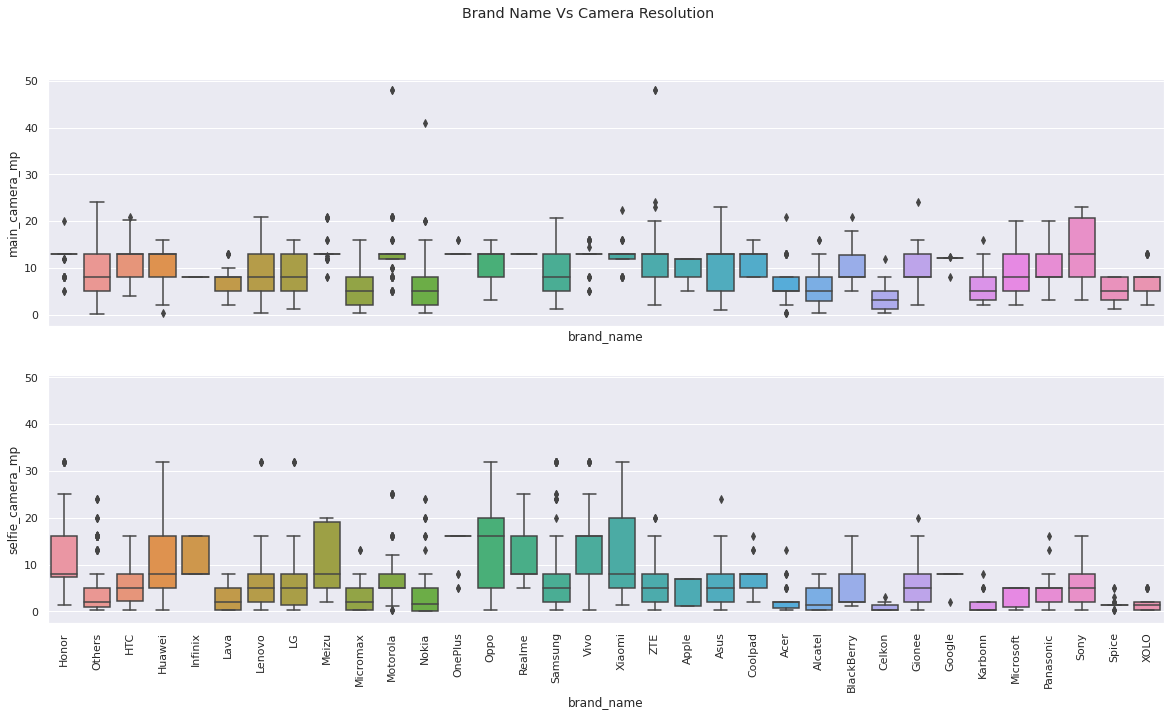

In [97]:
fig, axes = plt.subplots(2,1, figsize=(20, 10),sharex=True,sharey=True)
fig.suptitle("Brand Name Vs Camera Resolution")
sns.boxplot(data=df_final, x="brand_name", y="main_camera_mp",ax=axes[0])
sns.boxplot(data=df_final, x="brand_name", y="selfie_camera_mp",ax=axes[1])
plt.xticks(rotation=90);

Brand Name vs Ram

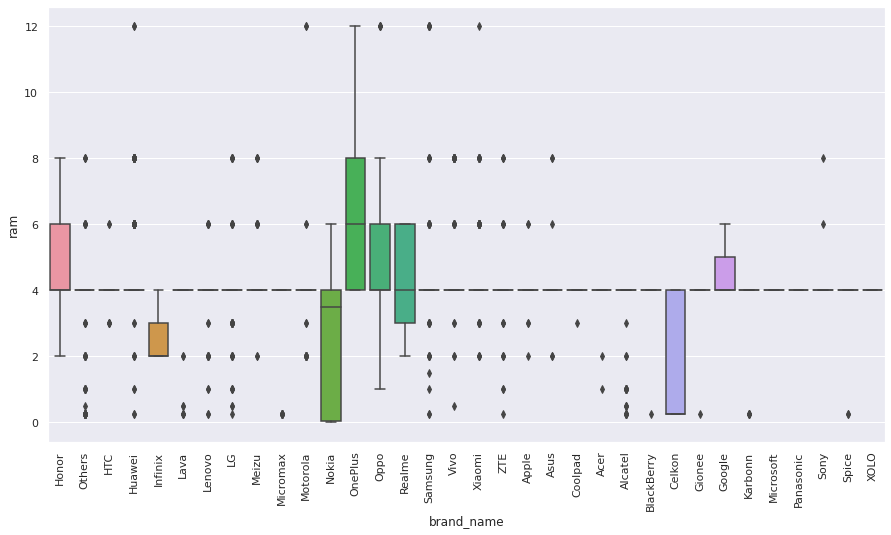

In [98]:
# Boxplot showing variation in RAM across brands
plt.figure(figsize = (15,8))
sns.boxplot(data=df_final, x='brand_name', y='ram')
plt.xticks(rotation=90);

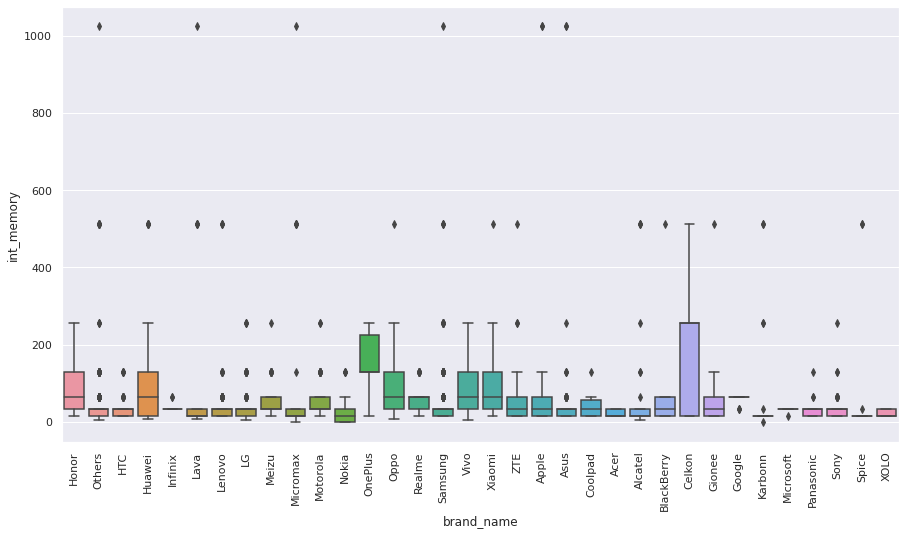

In [99]:
# Boxplot showing variation in int_memory across brands
plt.figure(figsize = (15,8))
sns.boxplot(data=df_final, x='brand_name', y='int_memory')
plt.xticks(rotation=90);

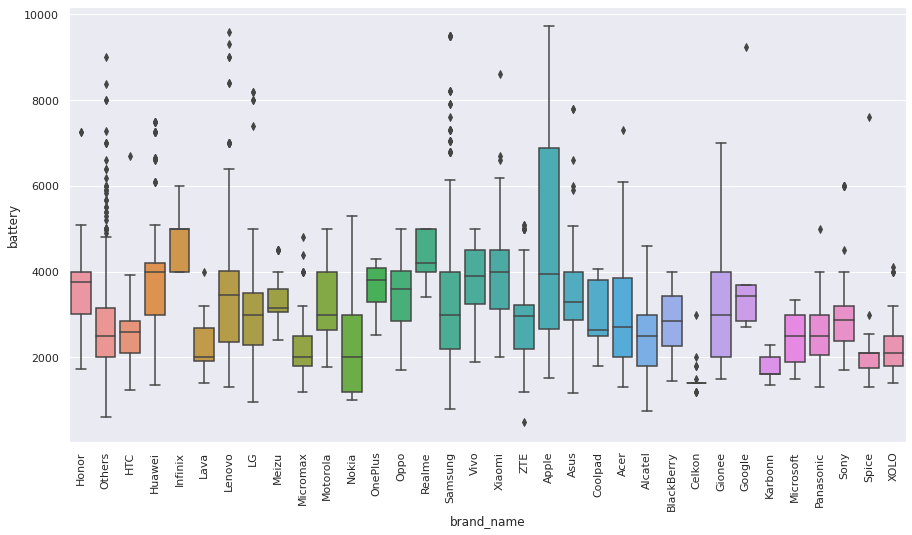

In [100]:
# Boxplot showing variation in battery energy capacity across brands
plt.figure(figsize = (15,8))
sns.boxplot(data=df_final, x='brand_name', y='battery')
plt.xticks(rotation=90);

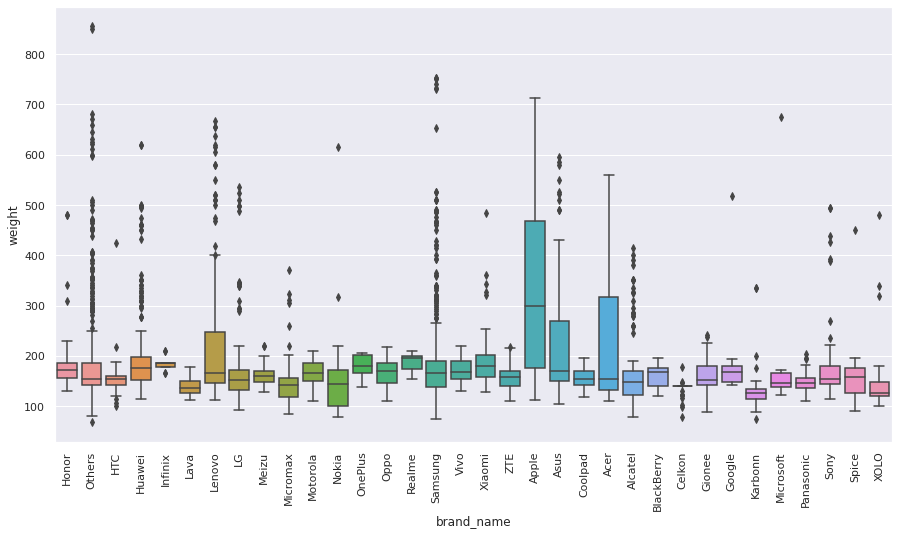

In [101]:
# Boxplot showing variation in weight across brands
plt.figure(figsize = (15,8))
sns.boxplot(data=df_final, x='brand_name', y='weight')
plt.xticks(rotation=90);

Broadly the inferences drawn from EDA before data treatment still holds valid and no major change in data distributions for univariate analyses or relationships between different variables are noticed

## Model Building - Linear Regression

In [102]:
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                           03:48:02   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

 > **Adjusted. R-squared**: It reflects the fit of the model.
 
   Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
  In our case, the value for adj. R-squared is **0.842**, which is good.


> ***const* coefficient**: It is the Y-intercept.

It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.

In our case, the value for `const` coefficient is **1.3156**


> **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).

In our case, the coefficient of `screen_size` is **0.0244**.

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [103]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### Model Performance on Training data

In [104]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model_train_perf = model_performance_regression(model, x_train, y_train)
model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


### Model Performance on Test data

In [105]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
model_test_perf = model_performance_regression(model, x_test, y_test)
model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict **`normalized_used_price`** within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the **`normalized_used_price`**

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [107]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [108]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

Lets select and identify all columns that have high VIF (VIF>5) except the const (intercept)

In [109]:
 high_vif_col=[]
 
# Search through the dataframe for all columns that have VIF>5 except the const(intercept) column and add it to high_vif_col
for index, row in checking_vif(x_train).iterrows():
  if(row['feature']!='const' and row['VIF']>=5):
    high_vif_col.append(row['feature'])


In [110]:
#Columns that have high VIF (>5) excluding the intercept column
high_vif_col

['screen_size',
 'weight',
 'brand_name_Apple',
 'brand_name_Huawei',
 'brand_name_Others',
 'brand_name_Samsung',
 'os_iOS']

In [111]:
#Looking at the effect of dropping each column with high VIF one at a time on Adj R-squared and RMSE
res = treating_multicollinearity(x_train, y_train,high_vif_col)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841809,0.232201
1,brand_name_Huawei,0.841808,0.232201
2,brand_name_Others,0.841806,0.232203
3,os_iOS,0.841795,0.232211
4,brand_name_Samsung,0.841774,0.232227
5,screen_size,0.838381,0.234703
6,weight,0.838071,0.234928


Observations:


*   'Screen_size' and 'weight' are the two numeric columns which have high VIF (>5)
*   As removing `weight` causes the adjusted R-squared to drop more than removing `screen_size`, we will be dropping `screen_size` first to see what effect it has on the VIF's of the remaining variables
* Although 5 dummy variables also have high VIF, we shall not be dropping them for multicollinearity treatment



In [112]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


Observations:

* Dropping `screen_size` , VIF's for all numerical variables are below 5 and do not need to be treated further for multicollinearity
* A number of dummy variables still have high VIF (greater than 5) but they won't be treated 
* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [113]:
model1 = sm.OLS(y_train, x_train2).fit()
print(model1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                           03:49:59   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations from model 1 after treating multicollinearity**

- We can see that adj. R-squared has dropped from 0.842 to 0.838, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Interpreting the Regression Results (continued)

> **std err**: It reflects the level of accuracy of the coefficients.
> The lower it is, the higher is the level of accuracy.


> **P>|t|**: It is p-value.
   
##### For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

##### $H_o$ : Independent feature is not significant ($\beta_i = 0$)
##### $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

   * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
   * A p-value of less than 0.05 is considered to be statistically significant.


> **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [114]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [115]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [116]:
model2 = sm.OLS(y_train, x_train3).fit()
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                           03:50:26   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Model Performance on Training Data

In [117]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model2_train_perf = model_performance_regression(model2, x_train3, y_train)
model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


### Model Performance on Test Data

In [118]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
model2_test_perf = model_performance_regression(model2, x_test3, y_test)
model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *model2* as the final model to move forward with
* Now adjusted R-squared is 0.838, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *model1* (where we considered the variables without multicollinearity) was 0.838
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *model2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [119]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = model2.fittedvalues  # predicted values
df_pred["Residuals"] = model2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


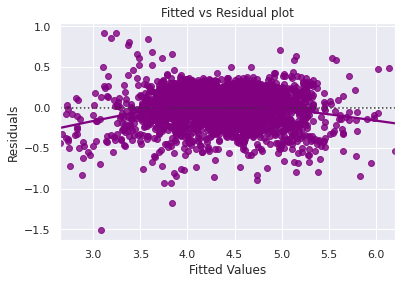

In [120]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

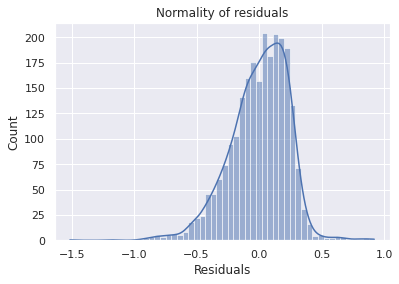

In [121]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does broadly have a bell shape though it appears slightly left skewed
- Let's check the Q-Q plot.

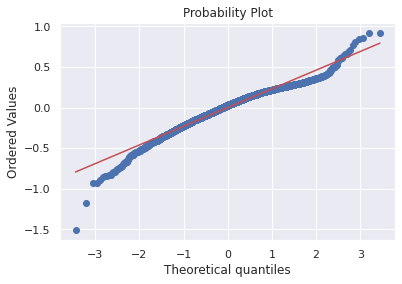

In [122]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [123]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995328206686811e-23)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [124]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.008750419910676), ('p-value', 0.4401970650667301)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [125]:
# predictions on the test set
pred = model2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [126]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [127]:
final_model = sm.OLS(y_train, x_train_final).fit()
print(final_model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                           03:51:30   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Let's print the linear regression equation.

In [128]:
# let's check the model parameters
final_model.params

const                   1.499981
main_camera_mp          0.020967
selfie_camera_mp        0.013827
ram                     0.020713
weight                  0.001662
normalized_new_price    0.441472
years_since_release    -0.029170
brand_name_Karbonn      0.115598
brand_name_Samsung     -0.037423
brand_name_Sony        -0.066993
brand_name_Xiaomi       0.080068
os_Others              -0.127575
os_iOS                 -0.090006
4g_yes                  0.050213
5g_yes                 -0.067259
dtype: float64

In [129]:
# Let us write the equation of linear regression
Equation = "Used Price ="
print(Equation, end=" ")
for i in range(len(x_train3.columns)):
    if i == 0:
        print(round(final_model.params[i],4), "+", end=" ")
    elif i != len(x_train3.columns) - 1:
        print(
            round(final_model.params[i],4),
            "* (",
            x_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(round(final_model.params[i],4), "* (", x_train3.columns[i], ")")

Used Price = 1.5 + 0.021 * ( main_camera_mp ) +  0.0138 * ( selfie_camera_mp ) +  0.0207 * ( ram ) +  0.0017 * ( weight ) +  0.4415 * ( normalized_new_price ) +  -0.0292 * ( years_since_release ) +  0.1156 * ( brand_name_Karbonn ) +  -0.0374 * ( brand_name_Samsung ) +  -0.067 * ( brand_name_Sony ) +  0.0801 * ( brand_name_Xiaomi ) +  -0.1276 * ( os_Others ) +  -0.09 * ( os_iOS ) +  0.0502 * ( 4g_yes ) +  -0.0673 * ( 5g_yes )


## Model Performance on Train and Test sets

In [130]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model_final_train_perf = model_performance_regression(
    final_model, x_train_final, y_train
)
model_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [131]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
model_final_test_perf = model_performance_regression(
    final_model, x_test_final, y_test
)
model_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.6% of the **`normalized_used_price`**

* Hence, we can conclude the model **`final_model`** is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

- Final linear regression model can explain 84% of the data variability and can be used to predict the **normalized used price** for smartphones/tablets within 4.6% of their actual price based on test data. This indicates that the model is broadly well suited for prediction as well as inference purposes.


- **Normalized used price** increases by 0.4415 units for every unit increase in **`normalized_new_price`**, all other variables staying constant. This indicates more expensive the original new price of the device, higher will be the used price all else being same

- **Normalized used price** increases by 0.0207 units for every unit increase in **`ram`**, all other variables staying constant. Reselling devices with higher RAM will fetch better used prices all else constant

- **Normalized used price** increases by 0.021 units for every unit increase in **`main_camera_resolution`**, all other variables staying constant. Acquiring and selling devices with higher main camera resolution will fetch better used prices, all else constant

- **Normalized used price** increases by 0.0138 units for every unit increase in **`selfie_camera_resolution`**, all other variables staying constant. Acquiring and selling devices with higher selfie camera resolution will fetch better used prices, all else constant

- **Normalized used price** increases by 0.0017 units for every unit increase in **`weight`**, all other variables staying constant. Acquiring and selling devices with heavier weight will fetch better used prices, all else constant

- **Normalized used price** decreases by -0.029 units for every unit increase in **`years_since-release`**, all other variables staying constant. Selling devices that have newer release dates would result in higher used prices all else constant

- **Normalized used price** of an device with 4g available on it will be 0.0502 units **higher** than a device without 4g, all other variables remaining constant.

- **Normalized used price** of an device with 5g available on it will be 0.0673 units **lower** than a device without 5g, all other variables remaining constant.

- **Normalized used price** of an device with iOs will be 0.09 units **lower** than a device with Android, all other variables remaining constant.

- Broadly, Recell can look to increase in acquiring used/refurbished devices in their inventory with certain attributes 

  - higher new price
  - increased RAM size
  - higher main and selfie camera resolutions
  - higher weight
  - availability of 4G
  - newer release dates

- Recell can also try to obtain user demographic data such as age, gender, annual income, occupation, geographic location to have a better sense of demand understanding and customer segmentation. 

- For example, there may be a preference for phones with better camera resolutions or 4G availability based on gender or in younger individuals. 

- 73% of all brands in the dataset offer high quality selfie cameras (greater than 8 MP). ReCell can focus acquiring used devices from those brands and also develop targeted ads for those brands towards demographics that prefer phones with better camera resolutions 

- Income/occupation/location information may gauge better understanding the affordability preferences of individuals.

- Higher income individuals may be more willing to buy more expenesive smartphones and/or replace existing smartphones to buy a new one compared to lower income individuals

- Understanding these behaviors can help ReCell create better targeted ads for different customer segments accordingly which can lead to higher sales and greater revenue

- 50% of the used device dataset comprises of older devices with release years from 2013-2015 while only 30% make up newer devices released between 2018-2020. This may suggest a larger market availability for older devices. The company is recommemded to increase their inventory share of used devices with newer release dates as these sell for higher prices relative to devices with older release dates. 

- Alternatively given the right customer segmentation strategy, older devices may be more appealing to lower income customers or customers looking to spend less money and this segment could be targeted for older devices








___